# Continued Fractions

This Open Educational Resource (OER) or book uses machine computation _to explore mathematical concepts_ and _to generate questions_. However, we're going to start this unit, as we did the previous unit on Fibonacci numbers, with hand computation and go slow for a while, first. Humour us, for a bit, and think of it as brushing up on arithmetic with fractions.  We will repeat some of our Python introduction, and gradually introduce some more Python as we go.

## A note to the Student/Reader

This unit is concerned mathematically with an old and seemingly simple subject, for which there are many references.  We will point out some as we go along.  The subject in question, continued fractions, is not really taught many places outside of number theory classes, and sometimes not there.  Nonetheless it's interesting, and worth studying on its own.  However, for our purposes here, it's really just a scaffold for learning Python.  It's the "spoonful of sugar" to make the medicine go down, so to speak.  We think that you will find it interesting for its own sake.  And, there are some open problems here, even though the material looks "simple".

## A note to the Instructor

We start slow in this unit, but we do get to deal with some of the deeper issues that this OER is ultimately concerned with: the power of computation, what does it mean to be random, and the like.  We touch on several issues that are part of the standard curriculum: for instance, we illustrate the idea of convergence (without ever mentioning the word, or constructing tests for whether or not things converge), and likewise illustrate the idea of approximation.  Nonetheless we intend the focus of this unit to be on the programming constructs, and the math just to be used as fun.  We introduce some new and powerful tools, however, beginning with the Online Encyclopedia of Sequences.

There are some surprising rough spots for student learning here.  One that stands out is the transition from the mathematical notation for a sequence, say $x_k$, to the programmatic use of indexing into a list or array `x[k]`.  There is a strong tendency of students encountering the material for the first time to name their variables `xk` (and still want the index $k$ to vary over the discrete set of indices).  This is something that many students just gloss over and get right, but the ones who get bogged down are really (or seem to be really) struggling with the rather deep notion of a real function with a discrete domain.  We have found it worthwhile to slow down when going over this speed bump.  For the students who _do_ get it straight away, of course, it will seem mystifying that anyone could have trouble; but we think there is a reason for it.

The whole point of this section is to get to the Gauss map, $x_{k+1} = G(x_k)$, which maps a real number in $[0,1)$ to another real number in $[0,1)$.  This nonlinear dynamical system has some very interesting _and analytically explainable_ dynamics, and the students can experience them without knowing anything about dynamical systems.  This map is really the _shift map_ on the continued fraction representation of the initial point, but that won't mean much to the students, so we don't mention it.  However, should they eventually take a dynamical systems course, this will provide an illuminating example.

We recommend that you actually make the students play the "Pass the Parcel" game out loud and in class. It works well in groups if students are at separate tables, but it could work even if people were seated in rows.  But they will feel stupid (it's a silly game) and you will have to cajole them into it.  Once they get started they will laugh at themselves and enjoy it, and it will silently reinforce several notions about iteration, so it is worth doing.

We did _not_ "cover all this material" in any one year.  Let the students pick and choose.  It's possible that you will be able to help the students cover more than we did, because reading is faster than listening, and the students ought to be able to read this material directly.  But it's also possible that they will choose to follow some of the many breadcrumbs here to other interesting things!  It's also possible that they will prefer you to read this, digest it for them, and present it to them in some interactive way that makes it more lively.  Have fun!

## A mysterious sequence

In the unit after this one, on Rootfinding, the following mysterious sequence will arise naturally; here, we just throw it down.
\begin{equation*}
	1, \frac{3}{2}, \frac{17}{12}, \frac{577}{408}, \frac{665857}{470832}, \cdots
\end{equation*}

We could suggest that you _try_ to guess what the rule is for generating these numbers ("guessing the next term" is a common kind of puzzle, see e.g. https://www.mathsisfun.com/algebra/sequences-finding-rule.html), but unless you've seen it before, this example is actually pretty difficult (out of the blue like this, and unmotivated).  Soon, we will show a powerful tool (the [Online Encyclopedia of Integer Sequences](http://oeis.org/) OEIS) which makes this sequence, and many others, accessible. But without either experience or a powerful tool, this sequence is (in our opinion) too difficult to guess just now, because the rule is _nonlinear_.

Since we have mentioned it, go to the OEIS at the link above, and enter the _subsequence_ of numerators $1$, $3$, $17$, $577$. The program at the server will then suggest that the sequence is [A001601](http://oeis.org/A001601), which indeed it is; look at the next number at that link, which is 665857, the next term above.  One of the rules given at that link (there are several) is indeed how we generated these numbers.  The OEIS is a very powerful kind of index of examples from a wide cross-section of mathematics; it is a professional tool.  Notice that this sequence has _several_ explanations: it occurs in more than one context.  This is part of the power of the OEIS.

By entering only a _subsequence_ of the data, we are employing _Jon Borwein's Rule_ mentioned in the Preamble: "don't blow all your data on your conjecture".  Seeing the fifth entry, which we knew but held back, gives us some confidence that this is right.

This is not a mathematical proof, of course: but it is evidence.  We will talk more about this.

Here is the first Python code in this unit: all it does is draw some squares.  If you want to modify it, and you are reading this as a Jupyter Book,  click on the icon up in the top corner to download the Jupyter notebook.  We don't think you'll need the Python documentation just yet (although the code might look a bit mysterious, its intentions are straightforward), but you can find the [Python 3 documentation here](https://docs.python.org/3/) for when you do need it. One thing you _will_ need is that to modify this code you need to be working with a Jupyter notebook, not the Jupyter Book; again, if you are reading the Jupyter Book, and you want to switch to the notebook, click the download icon in the top right corner.  [Documentation for Jupyter notebooks can be found here](https://jupyter-notebook.readthedocs.io/en/stable/).  

In [1]:
L = [1,3.0/2.0, 17.0/12.0, 577.0/408.0]  # The first four terms of our mysterious sequence, as floating-point numbers
print( L )

[1, 1.5, 1.4166666666666667, 1.4142156862745099]


You might recognize one of those numbers, so we square them all.  Note the use of the `for s in ` construct.  This makes a new list `sq` out of the old list `L`.  After we look at the numbers, we will draw a diagram, more as practice in Python than anything else.

In [2]:
sq = [s**2 for s in L]
print( sq )

[1, 2.25, 2.0069444444444446, 2.000006007304883]


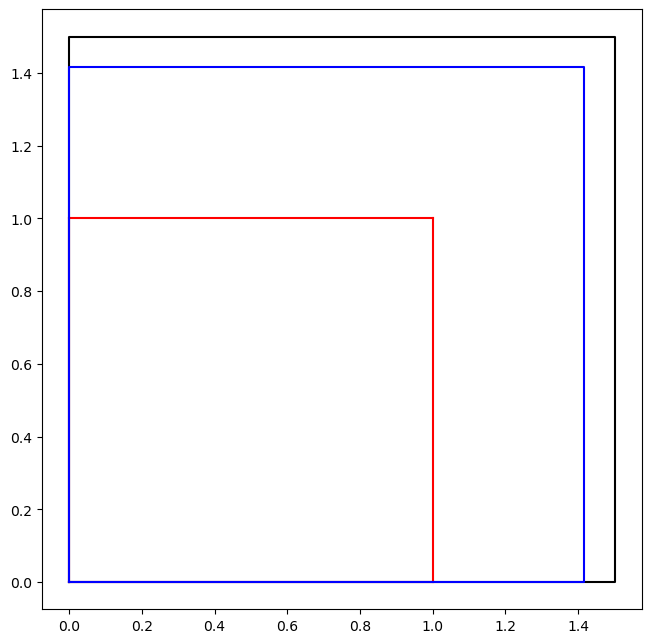

In [3]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0,0,1,1])

# Draw a square of side length L[0] = 1 # 'r' means "red"
plt.plot( [0, 0],        [0, L[0]],    'r' ) # line from origin to top left corner
plt.plot( [0, L[0]],    [L[0],L[0]], 'r' ) # line from top left to top right
plt.plot( [L[0],L[0]], [L[0],0],     'r' ) # line from top right to bottom right
plt.plot( [L[0],0],     [0,0],         'r' ) # line from bottom right to the origin

# Now do a square of length L[1] = 3/2 # 'k' means "black" (use shorter code, this time)
# We list all x-values first, then all y-values.  We have five points because we want to 
# draw all around the square, including back to the origin (0,0) where we started
plt.plot( [0, L[1], L[1], 0, 0 ], [0, 0, L[1], L[1], 0], 'k')  # all at once: all x, all y

# Now do a square of length L[2] = 17/12 # 'b' means "blue"
plt.plot( [0, L[2], L[2], 0, 0 ], [0, 0, L[2], L[2], 0], 'b')  # all at once: all x, all y

# Now do a square of length L[3] = 577/408 # 'g' means "green" (uncomment the line below to see)
# plt.plot( [0, L[3], L[3], 0, 0 ], [0, 0, L[3], L[3], 0], 'g')  # all at once: all x, all y

# Scale them all and draw them
ax.set_xlim( [-0.25, 1.75] )
ax.set_ylim( [-0.25, 1.75] )
plt.axis('equal')
plt.show()

The code above just draws three squares (if you uncomment the "green" block and run it, it will draw four squares; but the fourth one really looks like the third one so it's hard to see).  You should look carefully at the code to see what it is doing (pretty simple really, but programming is very fussy: missing brackets, commas, etc, can all cause headaches).  First Python notes: the comment character is `#` (so "uncommenting" means remove the `#` at the start of the line to make the line active), and lists start indexing at 0, so `L[0]` is the first element.  This might seem weird, but you get used to it. The other thing is one has to "import" various packages in order to do common things.  We'll see a lot of the matplotlib package; it is very useful.

The squares have side lengths equal to the numbers in the sequence above.  What are the exact rational _areas_ of the squares? Work out the first few, at least, by hand, and see if you can spot a pattern.  We'll do this down below, so if you don't feel like doing arithmetic just now, that's ok. But, some arithmetic is coming, so you might do well with a warm-up.

We now return to the mysterious sequence $1$, $3/2$, $17/12$, $\ldots$ .

In fact, each term $x_n$ is generated from its predecessor[^1] by the rule $x_n = \frac{1}{2}\left(x_{n-1} + \frac{2}{x_{n-1}}\right)$. This kind of thing is sometimes called a _recurrence relation_ or _iteration_ or _discrete dynamical system_.

Here are some activities that use this rule to give you practice in the following three things:
1. The use of mathematical subscripts to indicate a sequence
2. How to implement such a sequence "semi-manually" by using Python as a calculator
3. How to make that more efficient by using _ranges_ and _loops_ in Python

Even if you can already program in Python we suggest you at least read the activities, to make sure we're on the same page.

(ContinuedFractionActivity-1)=

````{admonition} Continued Fraction Activity 1
:class: tip
Open a fresh Jupyter notebook and type in a code cell the following three lines:
```python3    
x0 = 1
x1 = (x0 + 2/x0)/2
print (x1)
```
and press and hold the control key and the Enter key.  There, you have just used Python to compute the first Newton iterate for the square root of two; the computer should have printed out `1.5`. 
{ref}`[What happened when we did this] <ContinuedFractionActivityReport-1>`
````

(ContinuedFractionActivity-2)=

```{admonition} Continued Fraction Activity 2
:class: tip
Now copy the final two lines of that cell (not the `x0=1`) and put them in a fresh code cell, and change `x0` to `x1` and `x1` to `x2` everywhere.  Run it again. The notebook should print `1.4166666666666665`.  Do it again 4 more times, changing `x2` to `x3`, and `x3` to `x4`, and `x4` to `x5`, and `x5` to `x6` in their newly copied lines. You should find after running the program that _both_ `x5` and `x6` are `1.414213562373095`; no matter how many more times you do this (`x7`, `x8`, whatever) it won't change any more.
{ref}`[What happened when we did this] <ContinuedFractionActivityReport-2>`
 ```

(ContinuedFractionActivity-3)=

```{admonition} Continued Fraction Activity 3
:class: tip
Now go back and modify your print statements to be `print(x1, x1**2-2)`, `print(x2, x2**2-2)`, and so on, all the way up to `print(x6, x6**2-2)` and run all the cells again (in order).  You should see that the second numbers printed get smaller each time, until the line for `x5`. This says that `x5` squared is only about -4.4 times ten to the minus 16 smaller than 2 (we will see in a moment that this is not a very trustworthy statement).  That is, Python says that `x5` is the exact square root of a number only a proton's width away from two (see the appendix on floating point numbers).
{ref}`[What happened when we did this] <ContinuedFractionActivityReport-3>`
```

Coming back to the iteration rule $x_n = \frac{1}{2}\left(x_{n-1} + \frac{2}{x_{n-1}}\right)$, which works for arbitrary real (or complex!) numbers $x_{n-1}$, we specialize this to the case when $x_{n-1}$ is just a _rational_ number, say $p_{n-1}/q_{n-1}$.  What means the same thing, if we label the numerators and denominators by $x_{n-1} = \frac{p_{n-1}}{q_{n-1}}$ and $x_n = \frac{p_n}{q_n}$, we find by using rational arithmetic
\begin{align*}
\frac{p_n}{q_n} &= \frac12\left( \frac{p_{n-1}}{q_{n-1}} + \frac{2}{p_{n-1}/q_{n-1}}\right) \\ 
                &= \frac12\left( \frac{p_{n-1}}{q_{n-1}} + \frac{2q_{n-1}}{p_{n-1}}\right) \\
                &= \frac{ p_{n-1}^2 + 2q_{n-1}^2}{2p_{n-1}q_{n-1}}\>,
\end{align*}
after putting them over a common denominator.  This gives the following two separate equations for the numerators and denominators:

$$
\begin{align}
	p_n &= p_{n-1}^2 + 2q_{n-1}^2\\
	q_n &= 2p_{n-1}q_{n-1}.
\end{align}
$$

(ContinuedFractionActivity-4)=

````{admonition} Continued Fraction Activity 4
:class: tip
Now we are going to do the same in _rational arithmetic_ by looking after the numerators and denominators $p_n$ and $q_n$ ourselves.  Either by going back and changing all your previous cells, or by writing fresh cells, enter the following (it can all be in one cell)
```python
p0 = 1
q0 = 1
p1 = p0**2 + 2*q0**2
q1 = 2*p0*q0
print( p1, q1, p1/q1, (p1/q1)**2-2, p1**2 - 2*q1**2, q1**2 )
... (these dots mean you should repeat typing each case p2/q2, p3/q3, etc. Yes, it's boring, but do it anyway)
p6 = p5**2 + 2*q5**2
q6 = 2*p5*q5
print( p6, q6, p6/q6, (p6/q6)**2-2, p6**2 - 2*q6**2, q6**2 )
```
{ref}`[What happened when we did this] <ContinuedFractionActivityReport-4>`
````

You should be a little tired of cutting-and-pasting and changing 3s to 4s and 4s to 5s etc; it's not _too bad_ in such a short program (and that's what it is, technically called a "straight-line program" because it has no loops), but it's clearly repetitive and error-prone unless you are very finicky (we are very finicky).  We'll start using loops in a moment, but right now there are two other puzzles that should appear when you run this program.  First, the pn/qn ratios should be giving the (apparently) same numbers as the xn before, and similarly the difference between squaring the ratio and 2.  But the last two entries give (as a ratio) the _exact_ numbers for `(pn/qn)**2 - 2` (if we have done our algebra right).  Our program generates the ratios $1/4$, $1/144$, $1/166464$, and so on until

\begin{equation*}
    x_6 = p_6/q_6 = \frac{1572584048032918633353217}{1111984844349868137938112}.
\end{equation*}

If you did not get those numbers, go look for your typos.  That sounds cruel and unsympathetic, but trust us, we have made our full share of typos, and we know that they happen.  We know that the above answer is right because we checked it in two independent ways: one by using another computer program (Maple) to compute them again, and the second by computing the following, which fits the general pattern and gives us a number extremely close to $2$.<br>
Python says that

\begin{equation*}
    \left( \frac{p_6}{q_6} \right)^2 - 2 = \frac{1}{1236510294063800469693771621893337765354742124544}.
\end{equation*}

That's about $8.0\times 10^{-49}$, not the $-4.4\times 10^{-16}$ from before.  The sign isn't even the same.  What happened? The puzzles are resolved by thinking about floating-point arithmetic versus exact integer arithmetic.  Write out a paragraph describing your understanding of the differences, and then read the symbolic algebra appendix and the floating-point appendix. <br>

One final point of this activity: we did not ever compare `p3/q3` to `p2/q2`, or any iterate to its previous one; instead, we tried to decide how good any iterate was (as an approximation to the square root of two) by checking to see how close its square was to two.  This is a kind of error analysis called "backward error analysis" and we will see that it is very useful.

(ContinuedFractionActivity-5)=

````{admonition} Continued Fraction Activity 5
:class: tip
_Lists_ in Python.  Lists are enclosed in square brackets, like this:
```python
x = [1.0] # x is a list with just one element, namely the floating-point number 1.0
print( x[0] ) # the first element has index zero; Python counts from 0
```
Type the above two lines into a fresh cell (don't just copy-and-paste, really type; it's practice for your fingers).  You don't have to type the comments (The hashtag and everything after that on each line) but you may.
{ref}`[What happened when we did this] <ContinuedFractionActivityReport-5>`
````

(ContinuedFractionActivity-6)=

````{admonition} Continued Fraction Activity 6
:class: tip
You can use a single list to store all the numbers `x0`, `x1`, `x2`, and so on; type these lines in
```python
x = [1.0]
print( x[0] )
nxt = (x[0]+2/x[0])/2
x.append( nxt ) # This appends an element to the list "x"  (if the list was called y, you would say y.append( nxt ))
print( "The list x is ", x )
print( "The first element of x is ", x[0] )
print( "The second element of x is ", x[1] )
```
That doesn't look very different to using two variables `x0` and `x1`, but it is: we can now automatically increment the indices.
{ref}`[What happened when we did this] <ContinuedFractionActivityReport-6>`
````

(ContinuedFractionActivity-7)=

````{admonition} Continued Fraction Activity 7
:class: tip
Type in the following and execute them:
```python
x = [1.0] # We reproduce our iteration using the list and indices into the list so we don't have new variable names
nxt = (x[0]+2/x[0])/2
x.append( nxt )
nxt = (x[1]+2/x[1])/2
x.append( nxt )
nxt = (x[2]+2/x[2])/2
x.append( nxt )
nxt = (x[3]+2/x[3])/2
x.append( nxt )
nxt = (x[4]+2/x[4])/2
x.append( nxt )
nxt = (x[5]+2/x[5])/2
x.append( nxt )
print( "The list x is ", x )
print( "The fifth element of x is ", x[4] )
print( "The sixth element of x is ", x[5] )
print( "The seventh element of x is ", x[6] )
```
{ref}`[What happened when we did this] <ContinuedFractionActivityReport-7>`
````

(ContinuedFractionActivity-8)=

````{admonition} Continued Fraction Activity 8
:class: tip
_Loops at last_ Type in the following and execute it:
```python
x = [1.0]
for k in range(6):
    nxt = ( x[k] + 2/x[k] )/2 # We don't really need "nxt" but it's a little more readable this way
    x.append( nxt )
print( x )
```
The indentation is important there.  More concisely, without the extra variable "nxt",
```python
x = [1.0]
for k in range(6):
    x.append( (x[k]+2/x[k])/2 )
print( x )
```
{ref}`[What happened when we did this] <ContinuedFractionActivityReport-8>`
````

(ContinuedFractionActivity-9)=

```{admonition} Continued Fraction Activity 9
:class: tip
Write a loop that uses two lists of integers, say `p` and `q`, and computes the exact integer numerators and denominators for the first six iterates.  Our answer: When we print `p` and `q` we get the following:

$$
\begin{gather*}
    [1, 3, 17, 577, 665857, 886731088897, 1572584048032918633353217] \\
    [1, 2, 12, 408, 470832, 627013566048, 1111984844349868137938112]
\end{gather*}
$$

{ref}`[What happened when we did this] <ContinuedFractionActivityReport-9>`
```

There are a lot of questions that can be asked about this sequence, and we'll list some below. By the end of this section, we hope that you'll already be more comfortable asking your own. 

(ContinuedFractionActivity-10)=

```{admonition} Continued Fraction Activity 10
:class: tip
_Feel free to copy that sequence on a piece of paper, "close the book" (or look away from the screen, whatever), and take ten minutes or so and write as many questions as you can, and don't worry about the answers_. 
{ref}`[Our list of questions] <ContinuedFractionActivityReport-10>`
```

After having written that sentence, one of us (RMC) did that activity, and wrote down fourteen questions in a few minutes. Two of those questions are sort of leading questions for this unit, so we'll reproduce them here.
1. What do the numbers $x_n^2 = \frac{p_n^2}{q_n^2}$ do as $n$ gets large?
2. What do the expansions of $x_n$ in [continued fractions](https://en.wikipedia.org/wiki/Continued_fraction) look like?

Another question we'll give away: where did this sequence and rule come from? If you really can't wait, you can start the next chapter, where that question is given an answer. This chapter and the next are independent enough that you can do that without losing the thread of the argument. **Using the "back" button works, in Jupyter Book, to get you back here when you've read that, if you want to**.  Or, you can give us a bit more trust, and keep reading here.

```{epigraph}
At first glance, nothing seems simpler or less significant than writing a number, say $\frac{9}{7}$, in the form
\begin{equation*}
	\frac{9}{7} = 1 + \frac{2}{7} = 1 + \cfrac{1}{\frac{7}{2}} = 1 + \frac{1}{3 + \frac{1}{2}} = 1 + \cfrac{1}{3 + \cfrac{1}{1 + \frac{1}{1}}}.
\end{equation*}
It turns out, however, that fractions of this form, called _continued fractions_ provide much insight...

-- from p. 3 of C. D. Olds, "Continued Fractions", published in 1963 by The Mathematical Association of America {cite:p}`Olds1963`
```

Carl Douglas Olds won the 1973 Chauvenet Prize, the highest award for mathematical exposition, for his paper "The Simple Continued Fraction for $e$." The book cited above is likewise a model of lucidity, and reads very well today.


What's happening there? You can see that we haven't really _done_ anything, by working backwards: $1+1/1$ is $2$, so $3+1/2 = 7/2$, so $1 + 2/7 = 9/7$ which is what we started with. So this is just a way to rewrite a rational number.  What, exactly, did we do to get there?  What's the process?  And what does it look like for our sequence $1$, $3/2$, $17/12$, and so on?

First, we take out the integer part. For our first two numbers, nothing much happens:

$$
\begin{align}
	1 &= 1 \quad \text{already} \\
	\dfrac{3}{2} &= 1 + \dfrac{1}{2} = 1 + \cfrac{1}{1 + \frac{1}{1}} \>,
\end{align}
$$

but this last isn't much obvious use.  From now on, we'll try to avoid ending the continued fraction with + 1/1.  In almost all cases, we will be able to do that.

The next number is more interesting:

$$
\begin{align}
	\dfrac{17}{12} &= \dfrac{12 + 5}{12} \\
    &= 1 + \dfrac{5}{12} \\
	&= 1 + \cfrac{1}{\frac{12}{5}} \\ 
    &= 1 + \cfrac{1}{2 + \frac{2}{5}} \\ 
    &= 1 + \cfrac{1}{2 + \cfrac{1}{\frac{5}{2}}} \\
	&= 1 + \cfrac{1}{2 + \cfrac{1}{2 + \frac{1}{2}}} \>.
\end{align}
$$
It looks like a pattern is emerging.

The crucial step in this process is writing the fractional part that we get, after taking out the integer part, as a reciprocal of another fraction:
\begin{equation*}
	\dfrac{5}{12} = \cfrac{1}{\frac{12}{5}}.
\end{equation*}
	
Now a longer example:

$$
\begin{align}
	\dfrac{577}{408} &= \dfrac{408 + 169}{408} \\ 
    &= 1 + \dfrac{169}{408} \\ 
    &= 1 + \dfrac{1}{\frac{408}{169}} \\
	&= 1 + \cfrac{1}{2 + \frac{70}{169}} \\ 
    &= 1 + \cfrac{1}{2 + \cfrac{1}{\frac{169}{70}}} \\
	&= 1 + \cfrac{1}{2+\cfrac{1}{2 + \frac{29}{70}}} \\ 
    &= 1 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{\frac{70}{29}}}} \\
	&= 1 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{2 + \frac{12}{29}}}} \\ 
    &= 1 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{\frac{29}{12}}}}} \\
	&= 1 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{2 + \frac{5}{12}}}}} \\ 
    &= 1 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{\frac{12}{5}}}}}} \\
	&= 1 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{2 + \frac{2}{5}}}}}} \\ 
    &= 1 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{2 + \frac{1}{2}}}}}}} \\
	&= 1 + [2 \>, 2 \>, 2\>, 2\>, 2 \>, 2 \>, 2] \quad \text{for short.}
\end{align}
$$

At this point, you may feel like sticking out your tongue and giving us a raspberry for such obvious cheating. Think of it like "television wrestling" and give the entertainment a chance!

## The game of _pass the parcel_
Who can play:
Initiator and any number[^2] of players.

Initiator "0" chooses a real (decimal) number, takes the integer part (which might be $0$ or even negative, this one time) and keeps it, and separates out the fractional part which should be in $[0, 1)$, and passes the fractional part to the first player, call them $A$.  

Example: suppose the number chosen was $5.318309886184$; the initiator takes the integer part, $5$, and computes the fractional part $x_0 = 0.318309886184$ and passes it to the first player, $A$.

$A$ takes the number, _inverts it_, removes and keeps the integer part, and passes the new fractional part on to the next player, call them $B$.

In this example, $\frac{1}{0.318309886184} = 3.14159265359$ and the player $A$ keeps $\boxed{3}$ and passes $0.14159265359$ on to the next player, $B$. Each player follows these rules: 1) invert, 2) take & keep integer part, 3) pass fractional part on. The game ends if the received number is zero or repeats an earlier fractional part exactly. Mostly, it won't end! So, in practice, stop when you feel like it.


Here, player $B$ gets $0.14159265359$, inverts to $7.06251330592$, removes and keeps $\boxed{7}$ and passes $0.06251330592$ to player $C$. $C$ gets $0.06251330592$, inverts to $15.9965944095$, keeps $\boxed{15}$, passes $0.9965944095$ to $D$. $D$ inverts to $1.00341722818$, keeps $\boxed{1}$ and passes $0.00341722818$ to $E$. $E$ inverts to $292.63483365$, keep $\boxed{292}$ and passes $0.6483365$ to $F$. $F$ inverts to $1.57521580653$, keeps $\boxed{1}$. At this point, looking back, this means that
\begin{equation*}
	5 + \dfrac{1}{\pi} = 5 + \cfrac{1}{3 + \cfrac{1}{7 + \cfrac{1}{15 + \cfrac{1}{1 + \cfrac{1}{292 + \cfrac{1}{1 + \substack{\ \\ \ \\ \ddots}}}}}}} .
\end{equation*}

An associated activity for the players: compute the difference between your starting number and the final rational number you get.  You should see that each additional _partial quotient_ (which is what the kept integers are called) will give you at least one decimal digit of accuracy.

**Surprises** Rational $x_0$ always stop with 0 remainder at some point, while irrational $x_0$ will never stop.  Compare with Olds' rational example: 
\begin{equation*}
	\dfrac{355}{113} = 3 + \cfrac{1}{7 + \cfrac{1}{15 + \cfrac{1}{1}}}
\end{equation*}
which stops as claimed.

Several questions can arise here.  It's a good place for the reader to pause, and write some of them down.  Here's a few from us.  Some of them are interesting, but to be honest we're more interested in what your questions will be.

1. If $x_0$ is a rational number does the game stop after a fixed number of iterations?  Or can the game go arbitrarily long?  
2. If we start with an unreduced fraction, like 18/15, does it make a difference?
3. Can we draw a picture of this process?
4. What happens if you make an arithmetic mistake somewhere in the middle?
5. Can we use negative numbers?
6. Can we use noninteger entries in the continued fraction?
7. Can we use symbols (variables)?  What does $1 + [x, 2x, x, 2x, x, 2x]$ look like as a function of $x$?, for instance?

__Remark__: The game of "pass the parcel" works for Fibonacci numbers, too, but it's both a bit different (one has to pass _pairs_ ($F_{n-1}$, $F_n$) to the next person, who computes $F_{n+1}$ and passes the pair ($F_{n+1}$, $F_n$) on to the next person) and a bit boring in comparison: all the numbers do is get bigger, it seems.

## Another Python Program
Consider the small program below, which uses a list and a loop (see the activities of the previous unit, as well as those of this unit so far) to encode this process.  We have "hardwired" the loop to compute five "partial quotients" of the continued fractions; you may change that, of course, if you are reading this as a Jupyter notebook and not as a Jupyter Book. (Click on the icon up in the top corner to download the Jupyter notebook, if you are reading this as a Jupyter Book).

In [1]:
r = 1.414213562373095
import math
a = [math.floor(r)]
for k in range(5):  # There's nothing special about "5"
    f = r - a[k]
    r = 1/f
    a.append( math.floor(r) )
print( a )

[1, 2, 2, 2, 2, 2]


As an informal activity, you should re-type every line of that (maybe it won't hurt to copy-and-paste the decimal approximation to $\sqrt2$) and write out a comment for each line explaining what it does.  The math.floor function computes the _largest integer less than or equal_ to whatever it gets called with.  The variable names (r, a, k, f) are all single-letter, which is ok for a short math program; they are sort of meaningful, even: r for root 2, ok "a" doesn't mean much, f for "fractional part", and then the index variable `k` because of the old Fortran convention: variables whose names start with the letters `i`, `j`, `k`, `ell`, `m`, `n` (i.e. the letters I&ndash;N ) are commonly thought of as INtegers.  This is not part of Python&mdash;you could call your variables whatever you wanted&mdash;but it makes your programs easier to read by people who share that convention.  

One thing we are skating past for the moment, whistling: that program uses floating point, and sometimes the behaviour is a bit weird.  To see what we mean, replace the first line with `r = 17/12`, and run the program: we expect it to terminate at [1,2,2,2], but in fact it generates [1, 2, 2, 1, 1, 70368744177664].  We will not explain that at this time, but merely wave our hands and say "rounding errors".  

We now return to thinking about the sequence $1$, $3/2$, $17/12$, $577/408$, $\ldots$.

When you think about it, it _is_ a bit mysterious that the simple rule
\begin{equation*}
	x_n = \dfrac1{2}{\left(x_{n-1} + \frac{2}{x_{n-1}}\right)}
\end{equation*}
can generate the continued fractions
\begin{equation*}
	1, 1 + [2], 1 + [2, 2, 2], \text{and } 1 + [2, 2, 2, 2, 2, 2, 2].
\end{equation*}
The next one,
\begin{equation*}
	\dfrac{665857}{470832} = 1 + [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
\end{equation*}
apparently has fifteen 2's in it; don't worry, we'll check that by computer, later. That's one, three, seven, and fifteen twos. What's next? That is an example of a puzzle sequence that is much easier for humans to get unaided, by the way. We'll leave that for now and go back to the first question, about $x_n^2 = \frac{p_n^2}{q_n^2}$.

The squares of our sequence are

$$
\begin{align}
    1 &\>, \\
    \dfrac{9}{4} &= 2\dfrac{1}{4} \>, \\
    \left(\dfrac{17}{12}\right)^2 &= \dfrac{289}{144} = \dfrac{288 + 1}{144} = 2 + \dfrac{1}{144} = 2 + \dfrac{1}{12^2} \>,\\
    \left(\dfrac{577}{408}\right)^2 &= \dfrac{332929}{166464} = \dfrac{332928 + 1}{166464} = 2 + \dfrac{1}{166464} = 2 + \dfrac{1}{408^2}
\end{align}
$$

and at this point, we might be prepared to bet that 
\begin{equation*}
	x_4^2 = \left(\dfrac{665857}{470832}\right)^2 = 2 + \dfrac{1}{470832^2} \approx 2 + 4.5\cdot10^{-12}.
\end{equation*}
Checking using RMC's phone (a Nexus 5), we see that this is, in fact, true. But what does it mean?

One thing it means is that our sequence can be written as
\begin{equation*}
	1 = \sqrt{1},\>\> \dfrac32 = \sqrt{1 + \dfrac{1}{2^2}},\>\> \dfrac{17}{12} = \sqrt{2 + \dfrac{1}{12^2}},\>\> \dfrac{577}{408}=\sqrt{2 + \dfrac{1}{408^2}},\>\> \dfrac{665857}{470832}=\sqrt{2 + \dfrac{1}{470832^2}} \approx \sqrt{2 + 4.5\cdot10^{-12}},
\end{equation*}
that is, apart from $x_0$, a sequence of square roots of numbers that rapidly approach $2$. The denominator of $x_5$ is
\begin{equation*}
	q_5 = 2p_4q_4 = 2\cdot 470832 \cdot 665857 \approx 2 \cdot 500,000 \cdot 650,000 = 6.5\cdot 10^{11};
\end{equation*}
the next
\begin{equation*}
	\left(\dfrac{p_5}{q_5}\right)^2 = 2 + \dfrac{1}{q_5^2} \approx 2 + 2\cdot 10^{-24},
\end{equation*}
which makes a difference from $2$ by about as much as adding one molecule to a mole of material makes [^3]. For reference, one mole of water weighs about 18.01528 grams; one molecule of water is going to be hard to detect!

Some more question present themselves. Does this continue? Is $x_5 = 1 + [2 \>, 2 \>, \ldots, 2]$ with thirty-one 2's in the continued fraction? Does $x_6$ have sixty-three 2's in it? Is $x_n^2 = 2 + \frac{1}{q_n^2}$ always? Does this mean that $x_n \approx \sqrt{2}$?

<!-- The techniques of the calculus answer that last. The binomial theorem says (if $a > 0$) that

$$
\begin{align}
	\left(a^2 + b\right)^{\frac{1}{2}} &= a\left(1 + \dfrac{b}{a^2}\right)^{\frac{1}{2}} \\
	&\approx a\cdot\left(1 + \dfrac{1}{2}\cdot\left(\dfrac{b}{a^2}\right) + \mathcal{O}\left(\dfrac{b}{a^2}\right)^2\right)
\end{align}
$$

where the $\mathcal{O}$ symbol means here "about the same size as." Therefore

$$
\begin{align}
	\sqrt{2 + \dfrac{1}{q_n^2}} &= \sqrt{2}\left(1 + \dfrac{1}{2q_n^2}\right)^{\frac{1}{2}} \nonumber \\
	&\approx \sqrt{2}\left(1 + \dfrac{1}{4q_n^2} + \mathcal{O}\left(\dfrac{1}{q_n^2}\right)^2\right)\>.
\end{align}
$$

In other words, $\sqrt{\ \ }$ is a continuous function: if you change its argument only a little, then its output is only a little different. Thus, $\frac{17}{12}$, being the square root of $2 + \frac{1}{144}$, ought to be close to $\sqrt{2}\left(1 + \frac{1}{288}\right)$ or different to $\sqrt{2}$ only in the third decimal place.
 -->

We could use techniques from calculus to answer that last question, but let's try just using inequalities (it's good practice, anyway).  Suppose that $x^2 = 2+s$ for some $s>0$, and $y^2=2$ exactly; so $y=\sqrt{2}$ but we'll try not to use any knowledge of that more than $1 < y < 2 $.  Then
\begin{equation}
 x^2 - y^2 = (2+s) - 2 = s
\end{equation}
 and, factoring the difference of squares,
\begin{equation}
 x - y = \frac{s}{x+y} < \frac{s}{2y} < \frac{s}{2}
\end{equation}
 where we have used the facts that $x>y$ (which is because $x^2$ is greater than $2$, so naturally $x$ must be greater than the square root of $2$) and $y > 1$, and the ordinary rules for manipulating inequalities (which, admittedly, you might not have had a lot of practice with; they are a bit annoying and fussy).
 
 What does this _mean_?  We now know $0 < x - \sqrt{2} < s/2$ if $x^2=2+s$ with $s>0$.  That is, if the square of your estimate is nearly $2$, then your estimate is nearly the square root of $2$.  This in technical terms establishes the _continuity_ of the square root function, at least on one side.
 
An activity that would prepare you for analysis class: go through the steps in the case when $x^2 = 2 - s$ is smaller than $2$ and see if you can reach a similar conclusion. 
 
 Or, we can just draw it.  The following figure shows the case where $x^2 = 2 + s$ is bigger than $2$.  As an informal activity, alter the plot so it shows the case where $s$ is negative.
 

In [5]:
import numpy as np
n = 501
x = np.linspace(0,2,n)
y = np.zeros(n)
for k in range(n):
    y[k] = x[k]**2

The above loop computed a lot of points for the curve.  What follows is a plot of it, together with straight line segments and annotations.  First, we prepare all the constants we need for the annotation.

In [6]:
a = 17/12
b = a**2
r2 = np.sqrt(2)
two= 2

Now build the plot.

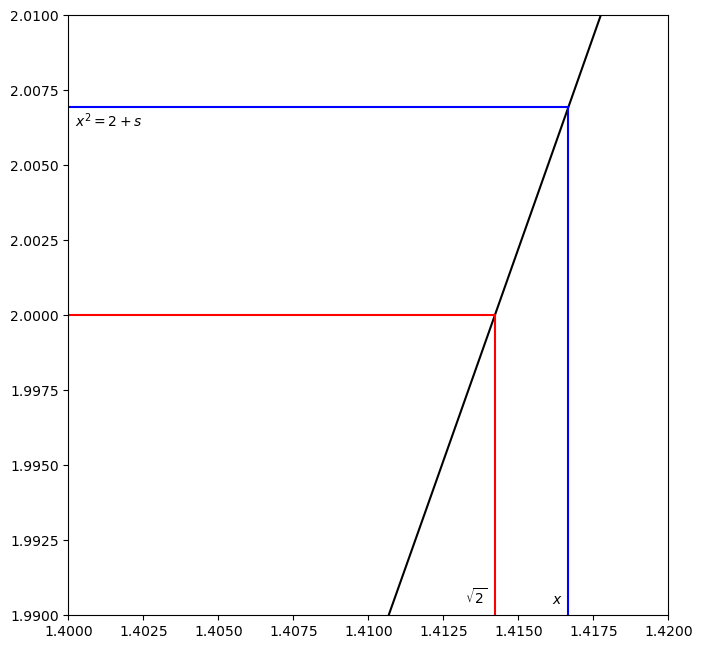

In [7]:
fig2 = plt.figure(figsize=(6, 6))
ax2 = fig2.add_axes([0,0,1,1])
plt.plot( x, y, 'k')  # The black line is y=x^2.  On the tiny scale plotted it looks pretty linear.
plt.plot( [r2,r2], [0,two], 'r')  # r for red
plt.plot( [0,r2], [two,two], 'r')
plt.plot( [a,a], [0,b], 'b')      # b for blue
plt.plot( [0,a], [b,b], 'b')
# Scale them all and draw them
ax2.axis('equal')
ax2.set_xlim( [1.40, 1.42] )
ax2.set_ylim( [1.99, 2.01] )
ax2.annotate( '$x^2 = 2+s$', xy=(0.125,0.87), xycoords='figure fraction' )
ax2.annotate( '$x$', xy=(0.92,0.075), xycoords='figure fraction')
ax2.annotate( r'$\sqrt{2}$', xy=(0.775,0.075), xycoords='figure fraction')
plt.show()

Looking back at that plot, we see that the horizontal distance from $x$ to $\sqrt{2}$ is pretty clearly less than half the vertical distance from $2+s$ to $2$.  That is the graphical interpretation of the inequality that we derived up above.  You can also see the source of our "could have used calculus" remark, because it is _the slope of the curve_ (which looks pretty linear on this scale) at $\sqrt{2}$ that determines the relationship of the horizontal width to the vertical width.  Well, actually, that's kind of the start of _real analysis_; we will leave things at that. 

Question: What happens with $[1,2,2]$, $[1,2,2,2,2]$, $[1,2,2,2,2,2,2,2,2]$ instead?  That is, with two 2s, four 2s, eight 2s, etc?
 With any even number of twos?  With any odd number of twos?  If you see a pattern emerging, can you prove it?
 
<!--  Can we get them to guess that an odd number means x^2 > 2 and an even number means x^2 < 2, we are a long way towards proof of convergence; but even a bracketing theorem is valuable
  -->
Indeed for example we have $(17/12)^2 = 2 + 1/144$ so we expect that the difference between $17/12$ and $\sqrt{2}$ should be smaller than $1/288$.  By direct computation,
\begin{equation}
	\dfrac{17}{12} = 1.416666\ldots
\end{equation}
while
\begin{equation}
	\sqrt{2} \approx 1.4142\ldots
\end{equation}
and $17/12-\sqrt{2} = 0.002453\ldots$ while $1/288=0.00347\dot{2}$ in agreement with our theorizing.

Here's another question. What is
\begin{equation}
	1 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{2 + \cfrac{1}{2 + \substack{\ \ \\ \\ \ddots}}}}}
\end{equation}
where the 2's continue forever? Does this make sense? At this point, many people are surprised at the perfect predictability, and repeating nature, of this continued fraction, because it is indeed true that with quite natural definitions, this infinite continued fraction can only be $\sqrt{2}$.

But "everybody knows" that the decimal expansion for $\sqrt{2}$ does not repeat, because $\sqrt{2}$ is irrational! Why is this different? Is it something special about $\sqrt{2}$? (Of course a continued fraction is not a decimal expansion.)

To answer that, we do some more examples. At this point, it's helpful if everyone in the class takes a different starting point, i.e. a different number. We'll do $\sqrt{3}$ here, but people should try lots of things: $\sqrt{4}$ is boring, but $\sqrt{5}$ is interesting, $\frac{\left(1 + \sqrt{5}\right)}{2}$ even more so. It's a bold move to think about cube roots, or $\ln(2)$.  How about $e$, or $\pi = 3.14159\ldots$?

Now $\sqrt{3} \approx 1.732\ldots$ (All we needed was that $1 < \sqrt{3} < 2$ so the integer part of $\sqrt{3}$ is $1$.) Thus
\begin{equation*}
	\sqrt{3} = 1 + \left(\sqrt{3} - 1\right) = 1 + \cfrac{1}{\cfrac{1}{\sqrt{3} - 1}}.
\end{equation*}
Now

$$
\begin{align}
	\dfrac{1}{\sqrt{3}-1} &= \dfrac{1}{\sqrt{3} - 1} \cdot \left(\dfrac{\sqrt{3} + 1}{\sqrt{3} + 1}\right) \\ 
    &= \dfrac{\sqrt{3} + 1}{\left(\sqrt{3}\right)^2 - 1^2} \\ 
    &= \dfrac{\sqrt{3} + 1}{2} \\
	&= \dfrac{2 + \left(\sqrt{3}-1\right)}{2} \\ 
    &= 1 + \dfrac{\left(\sqrt{3} - 1\right)}{2} \\ 
    &= 1 + \cfrac{1}{\cfrac{2}{\sqrt{3} - 1}}
\end{align}
$$

and
\begin{equation*}
	\dfrac{2}{\sqrt{3} - 1} = \dfrac{2}{\sqrt{3} - 1}\left(\dfrac{\sqrt{3} + 1}{\sqrt{3} + 1}\right) = \dfrac{2\cdot \left(\sqrt{3} + 1\right)}{\left(\sqrt{3}\right)^2 - 1^2} = \sqrt{3} + 1
\end{equation*}
by the same trick;
\begin{equation*}
	= 2 + \left(\sqrt{3} - 1\right).
\end{equation*}
Therefore,

$$
\begin{align}
	\sqrt{3} - 1 &= \dfrac{1}{1 + \frac{1}{2}\left(\sqrt{3} - 1\right)} \\
    &= \dfrac{1}{1 + \cfrac{1}{2 + \left(\sqrt{3} - 1\right)}} \\
	&= \cfrac{1}{1 + \cfrac{1}{2 + \cfrac{1}{1 + \cfrac{1}{2 + \left(\sqrt{3} - 1\right)}}}}
\end{align}
$$

by repeating the substitution. This suggests that
\begin{equation*}
	\sqrt{3} = 1 + [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, \ldots],
\end{equation*}
which is, indeed, true[^4]. So we can have repeating continued fractions from other things besides $\sqrt{2}$.

Here are some others to try: $e = 2.7182818284\ldots$, $\sqrt{13}$, $3^{\frac{1}{3}}$, $5^{\frac{1}{5}}$, $\gamma = 0.577\ldots$ (the Euler-Mascheroni constant), $\pi$, $\pi^2$, $\sqrt{\pi}$, $e^{\frac{1}{e}}$, $\pi^{\pi}$, $e^{\pi}$.

### Warning: the Python arithmetic changes when we import SymPy ("Symbolic Python")
SymPy has a class `Rational` which allows us to perform exact rational arithmetic, and also exact arithmetic on some exact numbers like $\sqrt{3}$.  We also import a pretty fancy piece of code called a "continued fraction iterator".  It's a power tool; go ahead and use it if you like.  We didn't write it, though&mdash;better give you [a link to the docs](https://docs.sympy.org/latest/modules/ntheory.html) (some of us haven't read them, so we could hardly blame you if you don't).  But it does introduce the important notion of an _iterator_ which we will see again. 

In [8]:
import sympy
from sympy.core import Rational, pi
from sympy import sqrt
from sympy.ntheory.continued_fraction import continued_fraction_iterator

def confrac(expr, n):
    result = []
    for i, v in enumerate(continued_fraction_iterator(expr)):
        if i > (n-1):
            break
        result.append(v)
    return(result)

In [9]:
# the first 7 partial quotients of the continued fraction of sqrt(3)
confrac(sqrt(3), 7)

[1, 1, 2, 1, 2, 1, 2]

In [10]:
# the first 10 partial quotients of the continued fraction of 1/pi
confrac(Rational(1, sympy.N(pi)), 10) # sympi.N(pi) means "Numerically evaluate pi"

[0, 3, 7, 15, 1, 292, 1, 1, 1, 2]

Question: Is that code correct?  Does it actually produce an approximation to $1/\pi$?  Let's see.

In [11]:
print( 1/(3+1/(7+1/(15+1/(1+1/(292+1/(1+1/(1+1/(1+1/(2))))))))) )
print( sympy.N(1/pi) )

0.3183098861846737
0.318309886183791


A little different, but believably within tolerance.

## Programming as a method of validation
Consider the assertion about that $\sqrt{3} = 1 + \overline{[1 \>, 2]}$ where $\overline{[1 \>, 2]}$ means the infinite repeating continued fraction
\begin{equation*}
	\cfrac{1}{1 + \cfrac{1}{2 + \cfrac{1}{1 + \cfrac{1}{2 + \cfrac{1}{\ddots}}}}}.
\end{equation*}
We will show in a moment a Python program to compute the successive truncations of  this fraction, namely $[1]$, $[1 \>, 2]$, $[1 \>, 2 \>, 1]$, and so on. 

<!-- The program we exhibit below is intended to show some features of Maple programming, but not to be the "best possible'' program for this particular computation. Here, simplest is best.

The basic idea of the program is that we will convert at each step
\begin{equation}
	1 + \left[1 \>, 2 \>, 1 \>, 2 \>, \ldots, \frac{a_{n-1}}{(a_n + s)}\right]
\end{equation}
to
\begin{equation}
	1 + \left[1 \>, 2 \>, 1 \>, 2 \>, \ldots, a_{n-1} + \frac{1}{(a_n + s)}\right]
\end{equation}
because
\begin{equation}
	\cfrac{\ddots}{a_{n-1} + \cfrac{1}{(a_n + s)}}
\end{equation}
can be written in our $\left[ \ \ \right]$ notation in either way. The program exhibits several useful features of Python programming: the most important of which is _assignment_, as in `a = 2;` which means the  variable named `a` is assigned the value 2, or as in `a = 1;` which means the variable `a` is assigned the value 1. The `def function():` block denotes a procedure body, intended to perform the statements contained in the body, each time the procedure is invoked. By assigning the procedure body to the name `bottomup3` we allow easy invocation, e.g. -->

In [12]:
# A program to convert a list of partial quotients to a convergent
def list_to_frac(inputlist):
    expr = 0
    for i in reversed(inputlist[1:]):
        expr += i
        expr = 1/expr
    return(expr + inputlist[0])

In [13]:
n = 1
cfrac1 = confrac(sqrt(3), n + 1)
print('Partial quotients of sqrt(3) when n = ', n,':', cfrac1)
list_to_frac(cfrac1)

Partial quotients of sqrt(3) when n =  1 : [1, 1]


2

which results in the answer 2, which is $1 + \frac{1}{1}$, the depth $n=1$ continued fraction.

In [14]:
n = 2
cfrac2 = confrac(sqrt(3), n + 1)
print('Partial quotients of sqrt(3) when n = ', n,':', cfrac2)
list_to_frac(cfrac2)

Partial quotients of sqrt(3) when n =  2 : [1, 1, 2]


5/3

yields $\frac{5}{3}$, which is $1 + \frac{1}{(1 + \frac{1}{2})}$. the depth 2 continued fraction. We can now ask for as many _convergents_ (as they are called) as we wish, or have patience for.

In [15]:
for i in range(1, 6):
    print('n = ', i)
    cfrac = confrac(sqrt(3), i+1)
    print(cfrac)
    expr = list_to_frac(cfrac)
    print('Result of continued fraction:', expr, 'or', sympy.N(expr))

n =  1
[1, 1]
Result of continued fraction: 2 or 2.00000000000000
n =  2
[1, 1, 2]
Result of continued fraction: 5/3 or 1.66666666666667
n =  3
[1, 1, 2, 1]
Result of continued fraction: 7/4 or 1.75000000000000
n =  4
[1, 1, 2, 1, 2]
Result of continued fraction: 19/11 or 1.72727272727273
n =  5
[1, 1, 2, 1, 2, 1]
Result of continued fraction: 26/15 or 1.73333333333333


This loop produces

$$
\begin{align}
	2  &\\
	\dfrac{5}{3} &= 1.66\ldots \\
	\dfrac{7}{4} &= 1.75 \\
	\dfrac{19}{11} &= 1.72727 \ldots \\
	\dfrac{26}{15} &= 1.733 \ldots 
\end{align}
$$

The noticing sort of person might see that these are alternating larger and smaller than $\sqrt{3}$. These don't seem to be approaching $\sqrt{3}$ all that fast, compared to our memory of the $\sqrt{2}$ example. But when we go back and look again, we see that it took _fifteen_ 2's to get us to $12$ decimal place accuracy, so we try

In [16]:
n = 15
cfrac15 = confrac(sqrt(3), n + 1)
print('Partial quotients of sqrt(3) when n = ', n,':', cfrac15)
list_to_frac(cfrac15)

Partial quotients of sqrt(3) when n =  15 : [1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]


18817/10864

To evaluate this to floating-point, use `sympy.N()`.  This is reminiscent of Mathematica notation, and means "Numerically evaluate".

In [17]:
sympy.N(list_to_frac(cfrac15))

1.73205081001473

Now, let's express $\sqrt{3}$ in decimals:

In [18]:
sympy.N(sqrt(3))

1.73205080756888

These should be comparable; we see that the error is $\mathcal{O}(10^{-9})$, not as good as that for $\sqrt{2}$ but not bad.

### Working backwards

What is $1 + \left[3 \>, 3 \>, 3\>, \ldots \right]$?
\begin{equation*}
	x = 1 + \dfrac{1}{y}
\end{equation*}
where $y = 3 + \frac{1}{y}$ _i.e._ $y^2 - 3y - 1 = 0$ _i.e._ $y = \frac{3 \pm \sqrt{9 + 4}}{2} = \frac{3 + \sqrt{13}}{2}$ because negative sign gives negative answer.

$$
\begin{align}
	x &= 1 + \dfrac{2}{3 + \sqrt{13}} \\
	&= \dfrac{5 + \sqrt{13}}{3 + \sqrt{13}} \\ 
    &= \dfrac{\left(5 + \sqrt{13}\right)\left(-3 + \sqrt{13}\right)}{-3^2 + 13} \\ 
    &= \dfrac{\left(-15 + 2\sqrt{13} + 13\right)}{4} \\
	&= \dfrac{-2 + 2\sqrt{13}}{4} \\ 
    &= \dfrac{\sqrt{13} - 1}{2} \approx 1.30277563773\ldots
\end{align}
$$

To check this, one could input the float value and compute its first few partial quotients.  On an HP48G+ (a thirty-plus year old calculator, but still working happily with its eleven-digit arithmetic) this generates $[1;3,3,3,3,3,3,3,3,3,1,\ldots]$ which agrees independently with the computation above, to the precision that is expected.  The final $1$ there after the eleventh $3$ is a result of rounding error in the computation. 


### Working _forwards_

If you try to compute a continued fraction from the bottom up, and the continued fraction is infinite, you have to decide where to truncate and then work backwards as we have been doing above.  If you decide at the end that you aren't happy with the accuracy you obtained, you have to go back, truncate the continued fraction farther down, and do it again.  This is annoying.

There is also a better way.  If the simple continued fraction is [$a_0$; $a_1$, $a_2$, $\ldots$ ] then the first two approximants are $a_0/1$ and $(a_0a_1 + 1)/a_1$, so we at least have something to start with.  Call the $n$th approximant $x_n$ and write it as the rational number $p_n/q_n$.  So $x_0 = a_0/1$ and so $p_0=a_0$ and $q_0=1$.  Then $p_1 = a_1a_0 + 1$ and $q_1 = a_1$.  "It can be shown that" 
\begin{align}
 p_{n+1} &= a_{n+1}p_n + p_{n-1} \\
 q_{n+1} &= a_{n+1}q_n + q_{n-1}
\end{align}
and this allows us to work _forward_ until we are happy with our approximation.  In the typical unit on continued fractions, one proves that the true answer is _trapped between_ successive convergents, and so the error is less than the difference between two successive convergents. 

If you want a mathematical proof, you can find one _very_ clearly written out in Olds' book on pages 21-24. The [Wikipedia article](https://en.wikipedia.org/wiki/Continued_fraction) has the theorems but not the proofs.  The proof in Olds is by induction, and we do recommend that you try to prove it yourself.

But if you don't want to prove it, you should at least program it.  Here's our program. Once we finished debugging, it successfully computed the value of the list of the partial quotients of the continued fraction for $e$.

__Remark on Indexing__ Above we have used $x_0 = p_0/q_0$ to start, indexing from $0$ like Python; Olds uses $x_1 = p_1/q_1$ to start, indexing from $1$ like Maple.  There are a variety of conventions in place, and one must be careful.

In [19]:
# Compute and return successive elements of the continued fraction.
# For the base case with just one entry, return the correct a[1]/1 and 0 (could have been "undefined")
# Code translated by Maple's CodeGeneration[Python]
def forward (a):
    n = len(a)
    if n==0:
        return( 0, 0 )
    elif n==1:
        return(a[0], 0)
    else:
        p0 = a[0]
        q0 = 1
        p1 = a[1] * a[0] + 1
        q1 = a[1]
        for k in range(3, n + 1):
            p = a[k - 1] * p1 + p0
            q = a[k - 1] * q1 + q0
            p0 = p1
            p1 = p
            q0 = q1
            q1 = q
        return( p1/q1, p0/q0 )


In [20]:
ex1,ex0 = forward( [2,1,2,1,1,4,1,1,6,1,1,8,1,1,10,1,1])
print( ex1, ex0, ex1-ex0 )

2.7182818284585633 2.718281828470584 -1.2020606732221495e-11


### Games
1. Who can find $x_0 \in (0, 1)$ that gives the biggest partial quotients? The longest transient? The longest period? In the first 5, 10? Obviously taking $x_0 = [1, N]$ for $N$ arbitrarily large works&mdash;but a quadratic? a cubic? How about a root of an equation with only coefficients $\pm 1$? How about the smallest partial quotients?
2. Who can write the shortest code? The fastest? the most general?

### The Gauss Map

The pass the parcel map from the game can be expressed mathematically as follows, where `frac` means "take the fractional part":
\begin{equation*}
	x_0 \to \mathrm{frac}\left(\frac{1}{x_0}\right)
\end{equation*}
Define
\begin{equation*}
	G(x) =
	\begin{cases}
	\mathrm{frac}\left(\frac{1}{x}\right) & x \neq 0 \\
	0 & x = 0
	\end{cases}
\end{equation*}
then the 1st parcel is $G(x_0)$ _i.e._ $x_1 = G(x_0)$, 2nd parcel is $G(x_1)$ _i.e._ $x_2 = G(x_1)$, etc.

*Draw $G(x)$* (This is harder to do nicely than it seems it ought to be).


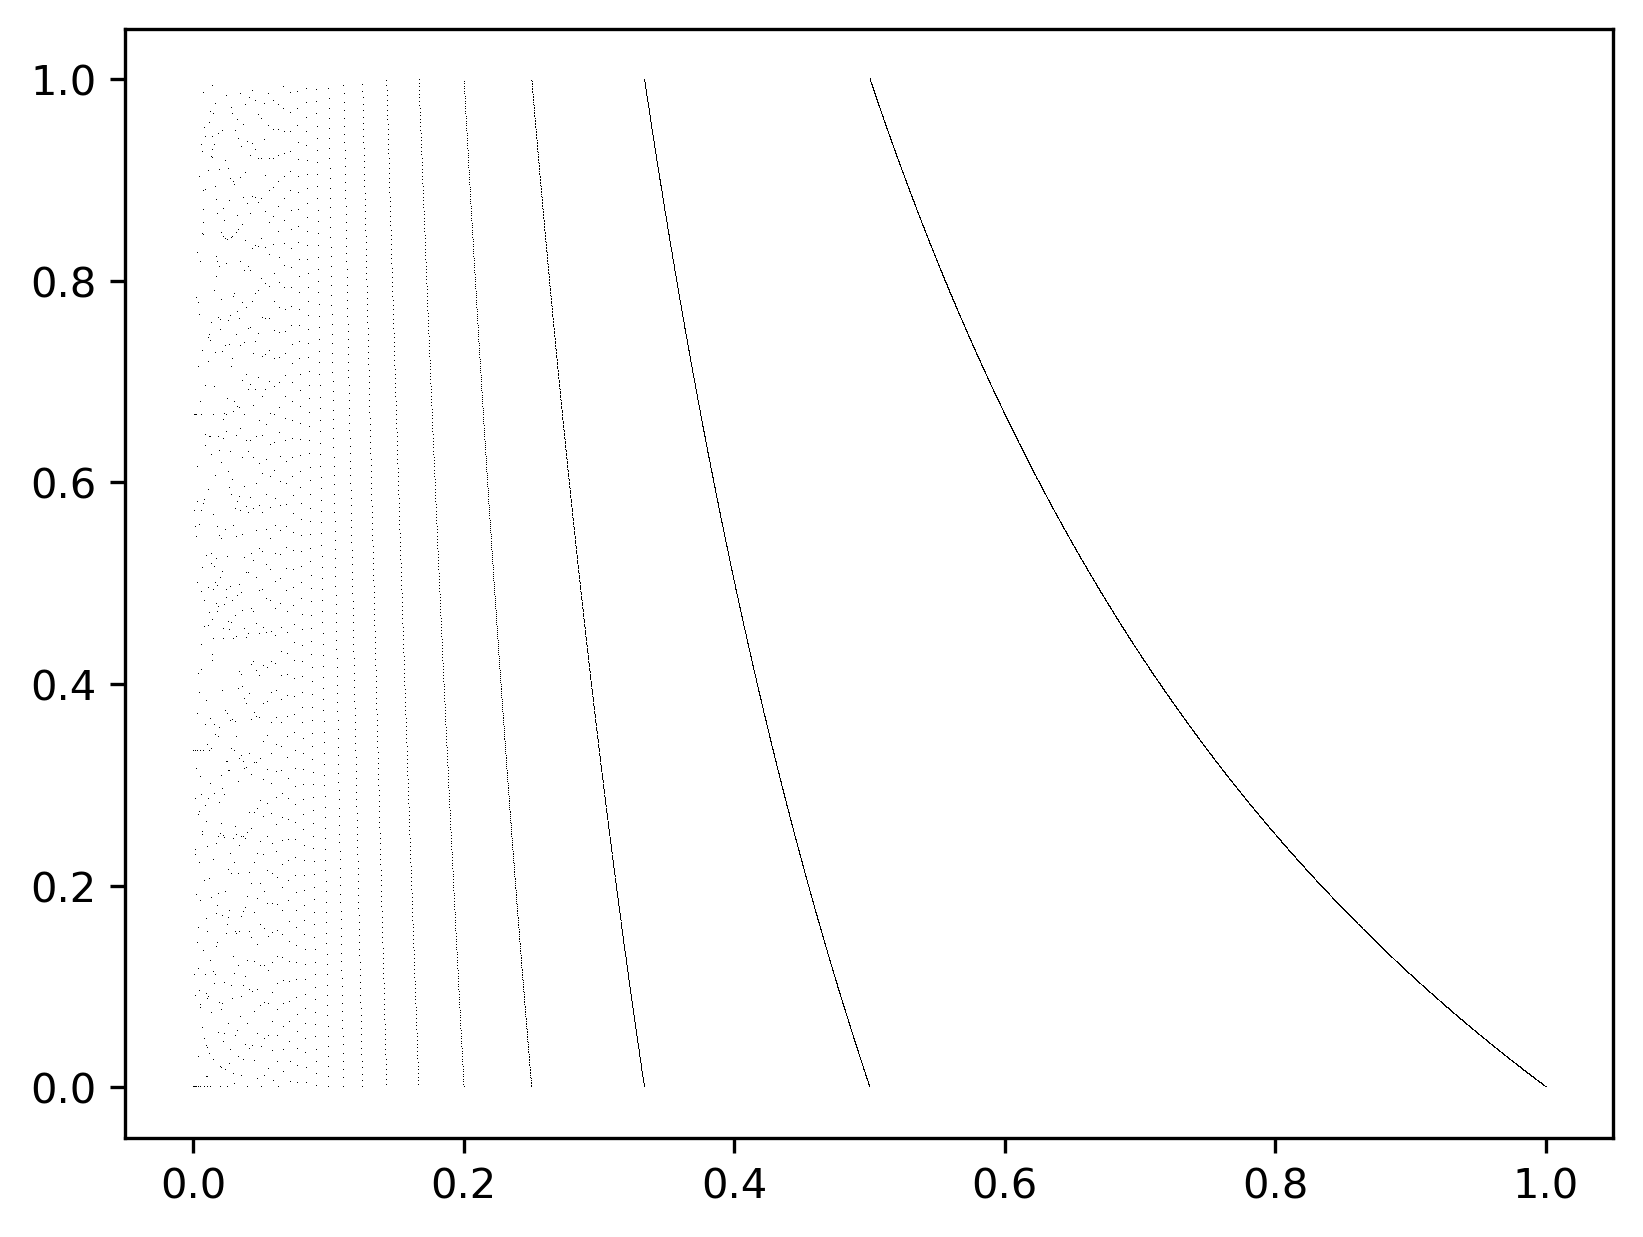

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt

G = lambda x: math.modf(1/x)[0]
vecG = np.vectorize(G)
x = np.linspace(0, 1, 10001, dtype=float)
y = vecG(x[1:])
y = np.append(0, y)
plt.figure(dpi=300)
plt.plot(x, y, 'k,' )
plt.show()

However, from the figure above, we can observe that the lines become increasing unclear as $x$ approaches 0. So we try something different: Instead of computing the corresponding $y$-values for linearly spaced $x$-values, we can plot this problem by computing the inverse.  Let $n$ be the integer part of $1/x$.  Then

$$
\begin{align}
    y &= G(x) = \frac{1}{x} - n \\
    \frac{1}{x} &= n + y \\
    x &= \frac{1}{n+y}
\end{align}
$$

for $n = 0, 1, 2, 3, \ldots$.

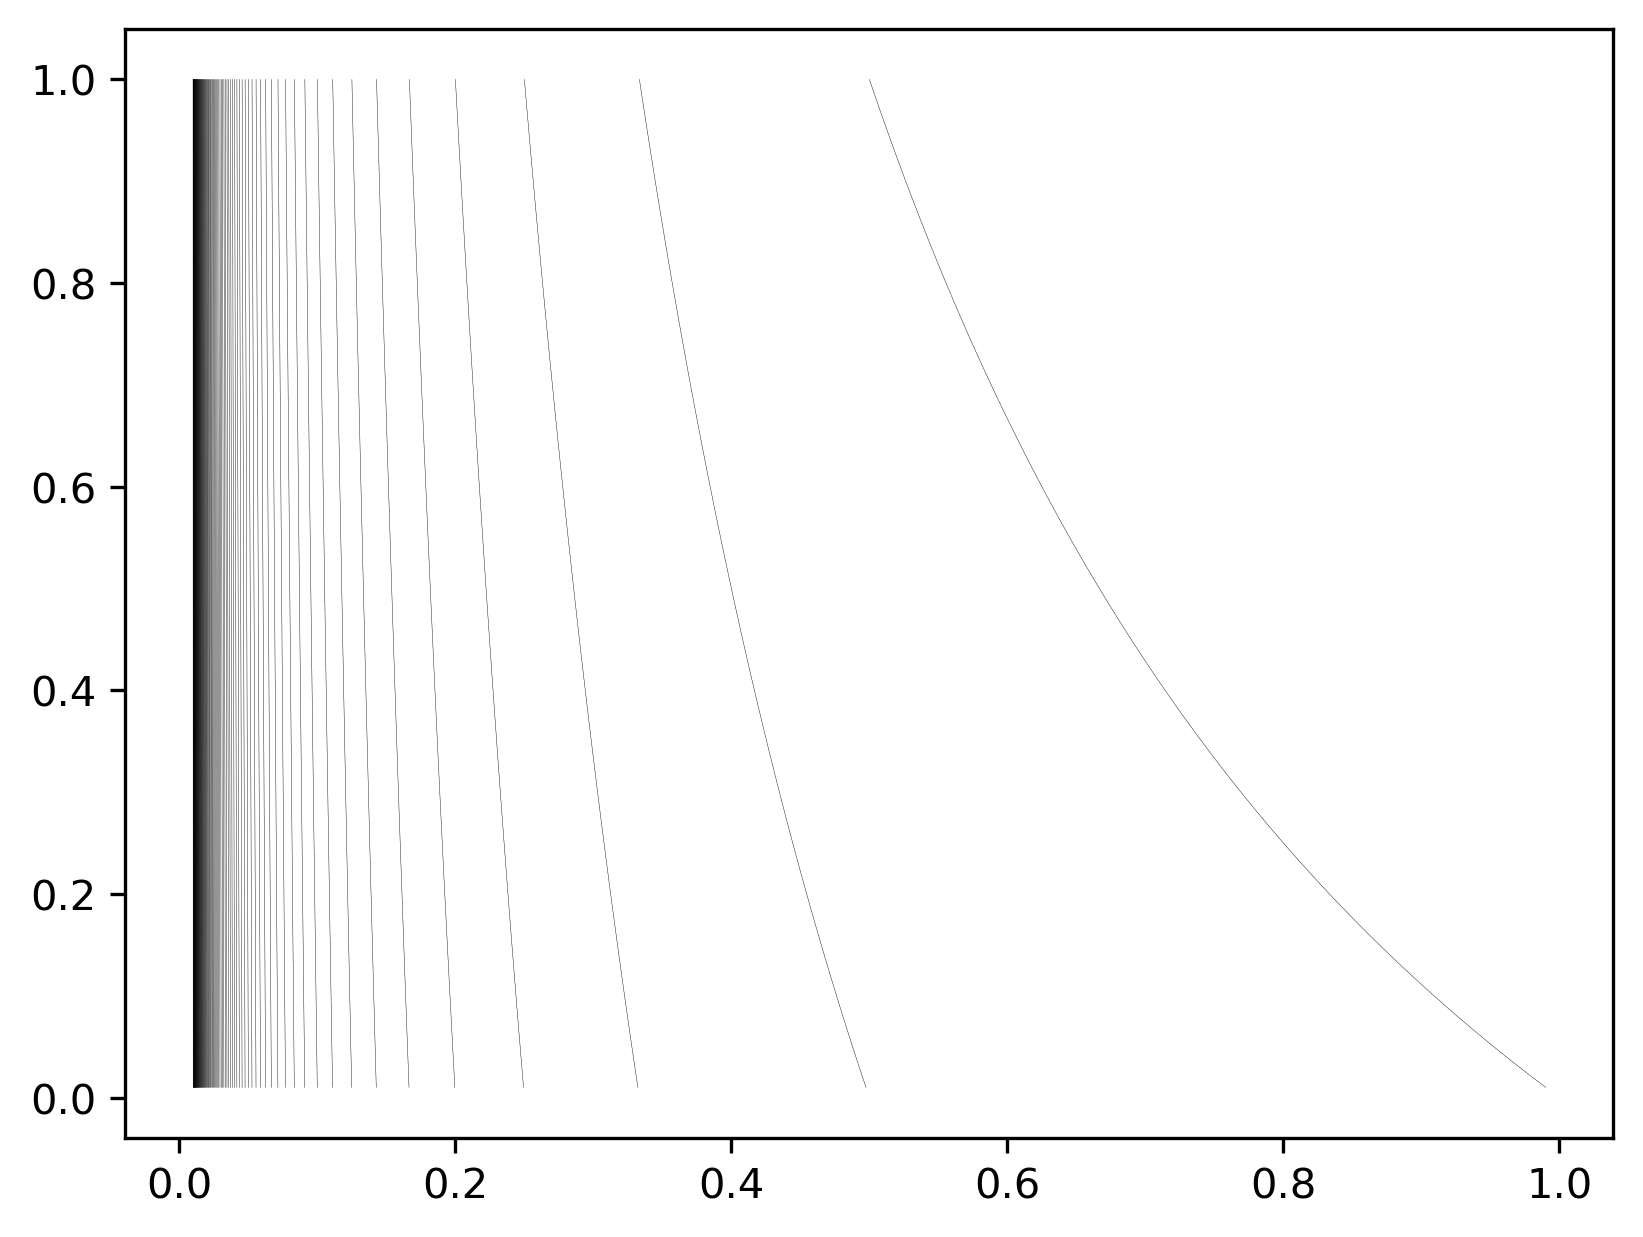

In [22]:
y = np.linspace(0,1,101, dtype=float)
recip = lambda t: 1.0/t
R = np.vectorize( recip )
y1 = y[1:]
N = 100
plt.figure(dpi=300)
for n in range(N):
    x = R(y1+n+1)
    plt.plot( x, y1, 'k', linewidth=0.1)
plt.show()

(ContinuedFractionActivity-11)=

```{admonition} Continued Fraction Activity 11
:class: tip
Write a Python program that plots the Gauss map on a _torus_.  Think of it as wrapping the top and bottom of the unit square around a cylinder, and then bending the cylinder around to make a torus.  Compare to the graph on the cover of the March 1992 issue of the American Mathematical Monthly, that is, Volume 99, no. 3.
{ref}`[Here's the image we made, but not our code] <ContinuedFractionActivityReport-11>`
```

## Floating-point issues

If one tries to do continued fractions with floating-point arithmetic (e.g. on a calculator) then some "interesting" issues arise. Many instructors won't know how to handle them, either&mdash;they're not in any modern calculus book that we know of, just some papers and of course in numerical analysis texts. But if the student is _not_ interested, the facts may seem dull as well as confusing.  Almost no-one likes dealing with rounding error.  See the appendix to this OER!  _In this particular case_ though, there is a uniform ["shadowing"](https://en.wikipedia.org/wiki/Shadowing_lemma) theorem: if one is working in arithmetic with unit roundoff $\mu$ (for IEEE double precision, $\mu = 2^{-53} \approx 10^{-16}$) then the computed $x_k$ from the pass-the-parcel game are the _exact_ $x_k$ for some slightly different starting point $x_0^*$ which differs _at most_ from $x_0$ by $4\mu$.  There are still subtleties lying around here, because in floating-point, orbits must ultimately be periodic; and by Lagrange's theorem, these can only be from quadratic irrational $x_0$.  These are a set of _measure zero_ in the reals; so we have the paradoxical result that floating-point simulation gives us results that almost surely can't arise if one chooses a true real number $x_0$ "at random".  This might be an interesting point of departure for a discussion with the students, but we found that it worked best with the grad students and the other senior students in the class, because it touches on dynamical systems and measure theory.  Indeed, the link above is to some fairly deep mathematics, but for the Gauss map, everything can be constructed explicitly.

We start with an example.

### Using Decimal Arithmetic to compute these
Start "pass the parcel" with $3.14$. The originator keeps $\boxed{3}$ and passes $0.14$ to $A$. $A$ inverts on a $3$ digit calculator (yes, we have one that can be set that way!) to get $7.143$; $A$ keeps $\boxed{7}$ and passes $0.143$ to $B$. $B$ inverts to get $7.000$, keeps $\boxed{7}$, and the game stops[^5]. This suggests
\begin{equation*}
	3.14 = 3 + \cfrac{1}{7 + \cfrac{1}{7}},
\end{equation*}
but is it? Using rational arithmetic, $3 + \left[7 \>, 7\right]$ is $3+\frac{7}{50} = 3+\frac{14}{100}$ which is $3.14$. So, it worked!

This kind of thing can get annoying. It's not _much_ of a problem if there are only human players, because they can argue a bit about when to stop, and reach sensible conclusions. The calculator if _it's_ playing can't do that, and might return
\begin{equation}
	3 + \left[7, 6, 1, 7142857142, 1, 6, 6, 1, 125313283, \ldots\right]
\end{equation}
and keep going from there, with the really large numbers indicating that something unexpected happened; to explain this, we'll need a bit more theory. But first another example. We compute $\frac{10}{3}$ on our calculator (an HP48G+, vintage 1995 or so: there are free simulators available, so you can play along):

$$
\begin{align*}
	\frac{10}{3} =\ &3.33333333333 \to \boxed{3} \\
	\text{invert} &\phantom{0}.333333333333 \text{ get } 3.00000000003 \to \boxed{3} \\
	\text{invert} &\phantom{0}.00000000003 \text{ get } 33333333333.3 \to \boxed{33333333333} \\
	\text{invert} &\phantom{0}.3 \text{ get } 3.33333333333 \to \boxed{3} \\
	\text{invert} &\phantom{0}.33333333333 \text{ get } 3.00000000003 \to \boxed{3}
\end{align*}
$$

and the game ends because of the _repeat_ rule. So instead of
\begin{equation*}
	\dfrac{10}{3} = 3+\dfrac{1}{3}
\end{equation*}
the calculator got
\begin{equation*}
	\dfrac{10}{3} \stackrel{?}{=} 3 + \cfrac{1}{3 + \cfrac{1}{33333333333 + \cfrac{1}{3 + \cfrac{1}{3 + \cfrac{1}{33\ldots3 + \substack{\ \\ \ \\ \ddots}}}}}}.
\end{equation*}
Because it's repeating, we can actually figure out what that number is:
\begin{equation*}
	x = 3 + \cfrac{1}{3 + \cfrac{1}{N + \cfrac{1}{x}}}
\end{equation*}
where $N = 33333333333$ (We've used this trick without comment: it is a bit suspicious, but we assure you it's okay here and can be rigourously justified). Then

$$
\begin{align}
	x &= 3 + \cfrac{1}{3 + \cfrac{x}{Nx + 1}} = 3 + \dfrac{Nx + 1}{3Nx + 3 + x} \\
	&= \dfrac{9Nx + 9 + 3x + Nx + 1}{3Nx + x + 3}
\end{align}
$$

so
\begin{equation*}
	x(3Nx + x + 3) = (9N + N + 3)x + 10
\end{equation*}
or
\begin{equation*}
	(3N + 1)x^2 - (10N)x - 10 = 0
\end{equation*}
so
\begin{equation*}
	x = \dfrac{10N \pm \sqrt{100N^2 + 40(3N+1)}}{2(3N + 1)} .
\end{equation*}
If we compute this to $30$ Digits in Python, like so, we can understand what's happening


In [23]:
N = 33333333333
x = sympy.Symbol('x')
eqn = (3*N + 1)*x**2 - 10*N*x - 10
sol = sympy.solve(eqn)
[sympy.N(z, 30) for z in sol]

[-3.00000000000299999999997600000e-11, 3.33333333333000000000003000000]

We ignore the negative root. We see the problem more clearly: $x$ is _not_ $\frac{10}{3}$ but instead is very close to it. We have computed not the continued fraction for $\frac{10}{3}$, but rather the continued fraction for a number that is very close to $\frac{10}{3}$, because of rounding error.

Computing continued fractions this way _always_ get the exact continued fraction for a number very close&mdash;depending on the precision used&mdash;to the one we wanted. In the language of the numerical analyst, this algorithm is _numerically stable_.{cite:p}`Corless1992`

Notice how different the continued fractions are, though
\begin{equation*}
	3 + [3]
\end{equation*}
versus
\begin{equation*}
	3 + \left[3, N, 3, 3, N, 3, 3, N, \ldots \right]
\end{equation*}

Nearby numbers will have continued fractions that agree only for a short initial segment (here, only two partial quotients). You should try to convince yourself that, say
\begin{equation*}
	x = 1 + \left[2, 2, 2, 2, 2 \right]
\end{equation*}
and
\begin{equation*}
	y = 1 + \left[2, 2, 2, 2, 2, M \right]
\end{equation*}
where $M = 1000$, say, are quite close; $x \approx y$. They'll be closer yet if $M = 10^6$, and closer yet again if $M = 10^{10}$. Try it and see.

## Random  Facts about Continued Fractions

The subsections in this section can be dipped into as desired; it's just a grab bag of information.

### Euclid's algorithm for greatest common divisor.

Suppose we compute the continued fraction for a rational number, $p/q$. It turns out the steps of the algorithm above&mdash;that is, applying the Gauss map and remembering the integer parts that arise&mdash;is exactly Euclid's algorithm for finding the greatest common divisor of $p$ and $q$.  Take for instance $16/10$. The integer part is $1$ and we have $6/10$ as the fractional part; invert it to get $10/6$ which has integral part $1$ again and fractional part $4/6$; invert that to get $6/4$ with integral part $1$ again and fractional part $2/4$; invert again to get $4/2$ and now we have an exact division to get $2$ (which is the GCD).  We can also (according to our rule, we don't do this, but this time we say that we can) write $2$ as $1+1/1$.  This gives $16/10 = [1;1,1,2] = [1;1,1,1,1]$.  Working backwards, we have 
\begin{equation}
1 + \cfrac{1}{1+ \cfrac{1}{1 + \cfrac{1}{2}}} = 1 + \cfrac{1}{1+ \cfrac{2}{3}} = 1 + \cfrac{3}{5} = \frac{8}{5}
\end{equation}
which is obviously right.

### The continued fraction for the golden ratio and its connection to Fibonacci numbers

The continued fraction with all partial quotients equal to $1$ gives the _golden ratio_ $\phi = (1+\sqrt{5})/2 = 1.618\ldots$. This is so because
\begin{equation}
\phi = 1 + \frac{1}{\phi}
\end{equation}
and recursively substituting the equation into its own right hand side produces nothing but
\begin{equation}
\phi = [1;1,1,1,1,1,1\ldots]
\end{equation}
Truncating these gives approximations to $\phi$ as ratios of Fibonacci numbers.  This continued fraction is interesting for several reasons, including the notion of "noble" numbers, which are all those numbers which have continued fractions _ending_ in $[\ldots, 1, 1, 1, \ldots]$, that is, ending with an infinite sequence of $1$s.  These somehow are the "least sensitive" to perturbations, and they show up in physical situations involving resonance (such as the rings around Saturn and Jupiter).

This gives another algorithm for computing Fibonacci numbers (which isn't a very good one): compute the partial quotients of $\phi$.  The forward recurrence is exactly the Fibonacci recurrence relation, and the backward recurrence winds up being the same.  So it's not interesting _as an algorithm_ but it's interesting to see that this "simplest of all" simple continued fraction is for $\phi$, and generates all the Fibonacci numbers.  Incidentally, this says that ratios of Fibonacci numbers are somehow the "best approximations" for $\phi$ (see the section below on best approximation).

### Inequalities

Because the partial quotients $a_k$ of a simple continued fraction are positive integers, something interesting happens with sequential convergents $p_{2k-1}/q_{2k-1}$, $p_{2k}/q_{2k}$, and $p_{2k+1}/q_{2k+1}$.  Let's consider it carefully.  We are indexing from zero for the first entry: suppose $x = [a_0; a_1, a_2, a_3, \ldots ]$. Then $x_0 = p_0/q_0 = a_0/1$ is an integer. The next iterate $x_1 = a_0 + 1/a_1$ is a positive quantity larger: $x_0 < x_1$.  But then $x_2 = a_0 + 1/(a_1 + 1/a_2)$ and (because the denominator is _bigger_) $1/(a_1+1/a_2) < 1/a_1$.  But it's still positive.  So $x_0 < x_2 < x_1$.

Now it begins to get a little hairy, but $x_3 = a_0 + 1/(a_1 + 1/(a_2 + 1/a_3))$; now $a_2 + 1/a_3 > a_2$ so its reciprocals flip the inequality: $1/(a_2 + 1/a_3) < 1/a_2$ (this is just what we did with $a_1$ and $a_2$ before); now adding $a_1$ we have $a_1 + 1/(a_2 + 1/a_3) < a_1 + 1/a_2$.  Okay.  Now reciprocate again, and this flips the sign of the inequality again, and when we add $a_0$ to both sides we have
\begin{equation}
a_0 + \cfrac{1}{a_1 + \cfrac{1}{a_2 + \cfrac{1}{a_3}}} > a_0 + \cfrac{1}{a_1 + \cfrac{1}{a_2}}\>.
\end{equation}
We don't know any "easy" way to just _see_ that; we had to work it through.  But once we believe it, then we find $x_3 > x_2$. What we have now is
\begin{equation}
x_0 < x_2 < x_3 < x_1
\end{equation}
and perhaps you will believe that this process can be continued and _all_ the even-numbered convergents will be smaller than _all_ the odd-numbered convergents, and that _all_ the even-numbered convergents increase and _all_ the odd-numbered convergents decrease. We have
\begin{equation}
x_0 < x_2 < x_4 < x_6 < \cdots < x < \cdots < x_7 < x_5 < x_3 < x_1 \>.
\end{equation}
Can you _prove_ this?

### Differences of convergents

Theorem 1.4 of Olds (p. 27) states that
\begin{equation}
p_{n+1}q_n - p_nq_{n+1} = (-1)^{n}
\end{equation}
where we have changed the formula so it indexes from zero.  Let us verify this for $p_0/q_0 = a_0/1$ and $p_1/q_1 = (a_0a_1+1)/a_1$: the case $n=0$ gives
\begin{equation}
p_1q_0 - p_0q_1 = (a_0a_1+1)\cdot 1 - a_0a_1 = 1 = (-1)^0
\end{equation}
so we have the indexing correct there, anyway.

Dividing both sides of that equation by $q_nq_{n+1}$ we have
\begin{equation}
\frac{p_{n+1}}{q_{n+1}} - \frac{p_n}{q_n} = \frac{(-1)^n}{q_nq_{n+1}}\>,
\end{equation}
which tells us something quite important: because the denominators _grow exponentially_ with $n$ (they grow at least as fast as Fibonacci numbers do), then the _difference between successive continued fractions_ can be made as small as we please by taking $n$ large enough.

Let's look at an example, with $n=2$:
\begin{equation}
x_3-x_2 = 1 + \cfrac{1}{2 + \cfrac{1}{3 + \cfrac{1}{4}}} - \left( 1 + \cfrac{1}{2 + \cfrac{1}{3}} \right)
\end{equation}
The code below shows that this is positive, and it should be $1/(30\cdot 7) = 1/210$. Computation shows that it is.

__Remark__ Using this theorem it is fairly easy to prove the inequalities in the cell above this one.

__Another Remark__ Going back and looking at the code `list_to_frac`, we see that the _code_ indexes the lists from $0$, and the variables are named as if the indexing starts from zero, but then abandons that connection for space reasons and just re-uses variables instead of keeping all convergents.  "Off-by-one" errors are extremely common in computing, and while&mdash;after many years of practice&mdash;we now can make our programs work relatively quickly, such indexing issues don't make it easier.  In the Maple version of this book, all the indexing is from one, and in some ways that makes it harder; but then there are issues with "off by one" errors in termination in Python, too, so it's kind of "six of one, half a dozen of the other".  Indeed the newer programming language Julia indexes from $1$, like Maple, for much this reason.  We have no advice except to be careful and to check.

In [24]:
ex1,ex0 = forward( [1,2,3,4] ) 
print( ex1, ex0, ex1-ex0, 1/210 )

1.4333333333333333 1.4285714285714286 0.004761904761904745 0.004761904761904762


### Solving Diophantine equations

A [Diophantine equation](https://en.wikipedia.org/wiki/Diophantine_equation) is an ancient type of equation, one where the solutions are desired to be _integers_ (and usually _positive_ integers).  They are named for [Diophantus](https://en.wikipedia.org/wiki/Diophantus) who wrote a book about them.  Continued fractions (or, equivalently, Euclid's algorithm) can be used to solve _linear_ Diophantine equations in two variables, and can also be used to solve _Pell's equation_

\begin{equation}
x^2 - Ny^2 = 1
\end{equation}
Perhaps the most famous of this kind of equation is [Archimedes' "Cattle of the Sun"](https://en.wikipedia.org/wiki/Archimedes's_cattle_problem) problem from antiquity.

This could be a nice topic for discussion: a complete solution to the problem can be found in Olds' text (for example).

### Generalized continued fractions

Continued fractions don't have to have just the "simple" form used above, but can also have different things in the numerator. For example, [Lord Brouncker](https://en.wikipedia.org/wiki/William_Brouncker,_2nd_Viscount_Brouncker) found the following continued fraction for $4/\pi$, at some time prior to 1656 when it was reported in a book by the mathematician [John Wallis](https://en.wikipedia.org/wiki/John_Wallis):
\begin{equation}
\frac{4}{\pi} = 1+ \cfrac{1^2}{2 + \cfrac{3^2}{2 + \cfrac{5^2}{2 + \cfrac{7^2}{2 + \cfrac{9^2}{\ddots}}}}}.
\end{equation}

### Lambert's proof of the irrationality of $\pi$

[Johann Heinrich Lambert](https://en.wikipedia.org/wiki/Johann_Heinrich_Lambert) used the following continued fraction to prove that $\pi$ [is irrational](https://en.wikipedia.org/wiki/Proof_that_%CF%80_is_irrational#Lambert's_proof).

\begin{equation}
\tan(x) = \cfrac{x}{1+\cfrac{x^{2}}{-3+\cfrac{x^{2}}{5+\cfrac{x^{2}}{-7+\cfrac{x^{2}}{9-\cfrac{x^{2}}{\ddots}}}}}}
\end{equation}
He first proved that if $x$ was rational then $\tan(x)$ must be irrational using this fraction; since $\tan(\pi/4) = 1$ is rational, it must then be true that $\pi/4$ is irrational, and hence $\pi$ must be irrational.


### Galois' Theorem

[Évariste Galois](https://en.wikipedia.org/wiki/%C3%89variste_Galois) discovered and proved that all _purely periodic_ continued fractions (like $1+\sqrt{2}$) are special quadratic irrationals: they are the positive roots of quadratic equations with integer coefficients, and the _other root_ of the quadratic must lie in the interval $(-1,0)$.  This might be fun for people to explore or argue over.  Again it might go better with senior students, but it doesn't depend on much more than being able to solve a quadratic equation and to know that the product of the two roots must be the constant coefficient.

### Lagrange's Theorem
[Joseph Louis Lagrange](https://en.wikipedia.org/wiki/Joseph-Louis_Lagrange) discovered and proved that all _ultimately periodic_ continued fractions are quadratic irrationals; that is, they are the roots of quadratic equations with integer coefficients.

This has startling implications: cube roots will not be periodic (is there any pattern, though?)  Transcendental numbers will not be periodic (but the number $e$ and its relatives have _amazing_ patterns in them).  There is a lot to play with, here.

Proving that an ultimately periodic continued fraction is a quadratic irrational is not so hard; proving that _all_ quadratic irrationals are ultimately periodic is harder.  The proofs are in Olds' book, however, if students are interested.

Here is a graphical representation of one "orbit" of the game of pass the parcel if one starts with $x_0 = \frac{14981}{19661}-\frac{\sqrt{46}}{19661} \approx 0.761620348406331$.    The game proceeds as in the table below.

| $n$| $x_n$                                         |  approximation    | aₙ | 
|----|-----------------------------------------------|-------------------|---|
| 0  | $\frac{14981}{19661}-\frac{\sqrt{46}}{19661}$ | 0.761620348406331 | 1 |
| 1  | $\frac{3566}{11415}+\frac{\sqrt{46}}{11415}$  | 0.312990129652485 | 3 |
| 2  | $\frac{112}{557}-\frac{\sqrt{46}}{1114}$      | 0.194988931792527 | 5 |
| 3  | $-\frac{1}{45}+\frac{\sqrt{46}}{45}$          | 0.128496221847228 | 7 | 
| 4  | $\sqrt{46}-6$                                 | 0.782329983125264 | 1 |
| 5  | $-\frac{2}{5}+\frac{\sqrt{46}}{10}$           | 0.278232998312525 | 3 |
| 6  | $-\frac{5}{3}+\frac{\sqrt{46}}{3}$            | 0.594109994375093 | 1 |
| 7  | $-\frac{2}{7}+\frac{\sqrt{46}}{7}$            | 0.683189997589324 | 1 |
| 8  | $-\frac{2}{3}+\frac{\sqrt{46}}{6}$            | 0.463721663854212 | 2 |
| 9  | $-\frac{6}{5}+\frac{\sqrt{46}}{5}$            | 0.156465996625053 | 6 |
| 10 | $-3+\frac{\sqrt{46}}{2}$                      | 0.391164991562646 | 2 |
| 11 | $-\frac{4}{5}+\frac{\sqrt{46}}{5}$            | 0.556465996625050 | 1 |
| 12 | $-\frac{1}{3}+\frac{\sqrt{46}}{6}$            | 0.797054997187546 | 1 |
| 14 | $-\frac{4}{3}+\frac{\sqrt{46}}{3}$            | 0.927443327708428 | 1 |
| 15 | $-\frac{3}{5}+\frac{\sqrt{46}}{10}$           | 0.0782329983125263|12 |
| 16 | $\sqrt{46}-6$                                 | 0.782329983125292 | 1 |

and because $x_{16} = x_4$ the game ends.  That table is a bit hard to read; it's easier in graphical form.  We represent each numbered value with a node, and put an edge with an arrow between two nodes where one value is generated by the previous one using the floating-point Gauss map.  We see the initial transient in the graph (the nodes $0$ through $3$), and then the loop starting at node $4$.  Once on the loop, the game loops forever.  What Lagrange's theorem says is that _every_ quadratic irrational has such a graph: a possibly very long transient followed by a possibly long loop.  Moreover, every such graph gives the continued fraction of a quadratic irrational.

```{image} ../Figures/Continued\ Fractions/nicetransient.png
:height: 300px
:alt: Frequency distribution for five thousand partial quotients of pi
:align: center
```


### Mental estimation of square roots

This one is accessible to everyone in the class.  The first step in the Newton approximation to the square root, using the initial estimate $x_0 = a$ (see the next unit), gives the following, which is also the first two entries in a (non-simple) continued fraction expansion:

\begin{equation*}
	\sqrt{a^2 + b} \approx a + \dfrac{b}{2a} .
\end{equation*}

For instance, this approximation gives

\begin{equation*}
	\sqrt{65} = \sqrt{64 + 1} \approx 8 + \dfrac{1}{16}.
\end{equation*}

Checking, we find

\begin{equation*}
	\left(8 + \dfrac{1}{16}\right)^2 = 8^2 + 2\cdot 8 \cdot \dfrac{1}{16} + \dfrac{1}{16^2} = 65 + \dfrac{1}{16^2}
\end{equation*}

Also, $1/16 = 0.0625$ so $8 + 1/16 = 8.0625$ so when we square that, either by hand multiplication or by calculator, we get $65.00390625$ which is more convincing because decimals are more intelligible.

As previously intimated,
it turns out there is a general formula, with a (slightly) generalized kind of continued fraction, namely
\begin{equation*}
	\sqrt{a^2 + b} = a + \cfrac{b}{2a + \cfrac{b}{2a + \cfrac{b}{2a + \substack{\ \\ \ \\ \ddots}}}}
\end{equation*}
(see page 137 of {cite:p}`Olds1963`) so
\begin{equation*}
	8 + \cfrac{1}{16 + \cfrac{1}{16 + \cfrac{1}{16 + \substack{\ \\ \ \\ \ddots}}}}
\end{equation*}
ought to give _better_ estimate of $\sqrt{65}$.  Taking just two of the "16"s we get $8.0622568093$ whereas the true square root of $65$ starts out $8.0622577483$, which has about six decimals of agreement.

#### A similar method RMC just learned, which is apparently current in some high schools

Instead of estimating $\sqrt{a^2+b}$ by $a + \frac{b}{2a}$, consider instead the following (rather strange-looking at first) trick.  Take $\sqrt{73}$ for example.  The squares that we know that surround this number are $64$ and $81$.  We have by plain subtraction that $64 + 9 = 73 = 81 - 8$. So the distance between the two square numbers is $81 - 64 = 9 + 8 = 17$.  Obviously the square root of $73$ must lie between $8$ and $9$. So, think about the number $8$ plus something in between $0$ and $1$ as an approximation to $\sqrt{73}$; why not $8 + \frac{9}{17}$?  This is the average distance, in some weird way.  This method has the advantage that it is also $9 - \frac{8}{17}$ so you get the same answer no matter which end of the interval you start from.

Notice that the next exact square after $a^2$ is $(a+1)^2$, so the distance between these two numbers is $(a+1)^2-a^2 = 2a+1$. That says that the blending formula can be written as $\sqrt{a^2+b} \approx a+\frac{b}{2a+1}$.  This formulation makes it easier to compare with the Newton estimate $a + \frac{b}{2a}$.

(ContinuedFractionActivity-12)=

```{admonition} Continued Fraction Activity 12
:class: tip
Which method gives a better approximation to $\sqrt{73}$, the $a + b/(2a)$ formula or the "blending" formula taught in some high schools and mentioned above?  Which method would be better, in general?
{ref}`[Our answer, for this instance] <ContinuedFractionActivityReport-12>`
 ```

(ContinuedFractionActivity-13)=

```{admonition} Continued Fraction Activity 13
:class: tip
Which method do you think would be easier to teach to high school students?  If you think that there's a difference, could you explain why you think so?
{ref}`[Our thoughts about this. In short, we're not sure.] <ContinuedFractionActivityReport-13>`
```

## Best Approximation

This section "steals a bit of thunder" from the typical entry-level number theory course; but since most students won't take any number theory, this may not be a problem.  But it's such a lovely bit of mathematics (which we just talk about here, without proofs) that perhaps the reader will be induced to take the number theory course, later.

One application of continued fractions is to find "nice" approximate fractions for decimals. This is harder than merely writing, say, 3.1416 as $\frac{31416}{10000} = \frac{3927}{1250}$ after cancelling $2^{3}$ from top and bottom. Playing "pass the parcel" gives
\begin{equation*}
	3 + \left[7, 16, 11, 6835269.99316 \right]
\end{equation*}
which suggests that $3 + \left[7 \>, 16 \>, 11\right]$ is the continued fraction for $\frac{3927}{1250}$. [It feels weird to throw out large numbers, but remember it's $+\frac{1}{\left(M + \cdots\right)}$, which will be very small, that we are really throwing out.]

What happens if we throw out the $11$, also?

$$
\begin{align}
	3 + \left[7 \>, 16 \right] &= 3 + \cfrac{1}{7 + \cfrac{1}{16}} \\ &= 3\dfrac{16}{113} \\ &= \dfrac{355}{113} \\
	&\doteq 3.14159292036 \>.
\end{align}
$$

Something interesting has happened: this is a _better_ approximation to $\pi$ than $3.1416$ is! This has six correct decimal places, unlike the four we started with! This kind of thing does _not_ always happen, but it happens enough that Derive, a CAS that now lives on certain TI calculators, used (uses) this algorithm and sometimes gets exact answers even when such can't be guaranteed. The underlying theorem is one of best approximation by rational numbers, and it turns out that the convergents of infinite continued fractions give in a certain sense these "best" approximation.

In essence, continued fractions are "economical" best approximations. If $\left|x - \frac{p}{q}\right| < \frac{1}{2q^2}$, then necessarily $\frac{p}{q}$ is one of the convergents of the continued fraction. This means that shorter $p$ and $q$ can be used&mdash;that is, the fractions are nicer.

### The astonishing continued fractions for e

We need to talk about [Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler), pronounced in English more like "Oiler".  Euler was one of the greatest mathematicians&mdash;it's sort of pointless to argue who was greater, Archimedes, Newton, Gauss, Euler, or Einstein; Leonardo da Vinci is a contender, too, and how could we compare them? We claim it is impossible to rank people who were clearly smarter than we are. We couldn't even _see_ the differences between them, much less judge them accurately.  And, all of them were rich and privileged in their own ways, and without doubt this list of the "greatest" is entirely Eurocentric; where does [Nasir al-Din al-Tusi](https://en.wikipedia.org/wiki/Nasir_al-Din_al-Tusi) (who was the academic ancestor of almost every modern mathematics PhD holder, according to the [Mathematics Geneology](https://genealogy.math.ndsu.nodak.edu/id.php?id=217509)) fit on this list, or Brahmagupta or Aryabhata or Liu Hui?  Anyway, pointless.  For any list of top ten, one could make a case that Euler belonged there.  His achievements and impact were astounding; one of the "minor" things is that he revolutionized mathematical notation and writing, and not just in English&mdash;he wrote mostly in Latin.  Reading mathematics before Euler is painful because everyone tried to put things into words; after Euler we are all comfortable reading equations as if they are part of the language, which they _are_.  

One of Euler's "minor" technical achievements (well, in comparison to things like the Euler equations for fluid flow, or Euler's method for solving differential equations, or the Euler&ndash;Lagrange equations of the calculus of variations) was unlocking many of the secrets of the number $e$, the base of the natural logarithms.  Euler defined this as
\begin{equation}
e := \lim_{n\to\infty} \left( 1 + \frac{1}{n}\right)^n
\end{equation}
but we are not going to pursue that here because that is properly part of modern Calculus.  Instead, we will display one of Euler's continued fractions:
\begin{equation}
\nu = \frac{e+1}{e-1} = 2 + \cfrac{1}{6 + \cfrac{1}{10 + \cfrac{1}{14 + \cfrac{1}{18 + \cfrac{1}{\ddots}}}}}
\end{equation}
If we know $\nu$, then because $(e-1)\nu = e+1$ or $e(\nu-1) = \nu+1$ we have
\begin{equation}
e = \frac{\nu + 1}{\nu - 1}\>.
\end{equation}
Because the partial quotients in $\nu$ grow so predictably&mdash;they increase by $4$ every time&mdash;one gets very accurate approximations for $\nu$ very quickly.

In [25]:
evenfrac = list_to_frac( [2,6,10,14,18])
oddfrac = list_to_frac( [2,6,10,14,18,22])
#evenfrac,evalf(evenfrac),oddfrac,evalf(oddfrac), evalf(oddfrac-evenfrac), evalf( (exp(1)+1)/(exp(1)-1));
print( evenfrac, oddfrac, oddfrac-evenfrac, (np.exp(1)+1)/(np.exp(1)-1) )

2.1639534135512517 2.1639534137389793 1.8772761123386772e-10 2.163953413738653


Experiments show that the even-ending lists are always _increasing_ while the odd-ending lists are always _decreasing_.  This means that
\begin{equation}
\frac{p_0}{q_0} < \frac{p_2}{q_2} < \frac{p_4}{q_4} < \cdots < \frac{p_5}{q_5} <\frac{p_3}{q_3} <\frac{p_1}{q_1}
\end{equation}
and our previous experiment suggested (which turns out to be true) that _all_ odd-ending continued fractions are larger than _all_ even-ending continued fractions, and moreover that the difference between them goes rapidly to zero.  This is the basis for the proof that the number $\nu$ really is represented by the continued fraction.  We _won't_ fill in the details, although we are so very close: instead we will just claim that these experiments are pointing at true facts.

The _practical_ fact that comes out of this theorem is that
\begin{equation}
\frac{33630}{15541} < \nu <  \frac{741721}{342762}
\end{equation}
which, when translated into much more intelligible decimals, says that $\nu = 2.163953413_{55}^{74}$ where the curious subscripts/superscripts mean that the true answer is trapped somewhere between $2.163953413{55}$ and $2.163953413{74}$. Welcome to the somewhat niche world of [interval arithmetic](https://en.wikipedia.org/wiki/Interval_arithmetic).

This translates to a similar "trapping" of the value of $e$: we put the too-big rational in the numerator and the too-small rational in the denominator and get an _overestimate_ of $e$, and put the too-small rational in the numerator and the too-big rational in the denominator and get an _underestimate_ of $e$.  When we do this we get the _very curious_ estimate, which surely would have pleased Euler,
\begin{equation}
\frac{16853950302}{6200221819} < e < \frac{16853950303}{6200221818}\>.
\end{equation}
What we find curious about that is that the numbers are very nearly the same on the left and the right, except the numerator is one greater and the denominator one less, on the right.
Translating this to decimals gives $e = 2.718281828_{29}^{89}$ which again traps $e$.  Using _one_ more partial quotient improves this to
\begin{equation}
{\frac{9681562563498}{3561647825527}} < e < {\frac{9681562563499}{3561647825526}}
\end{equation}
or $e = 2.71828182845_{82}^{94}$, which has two more decimal digits nailed down.

### Rational approximation to the exponential function

Lambert apparently discovered in 1766 that, if $x \ne 0$,
\begin{equation}
\nu(x) = \frac{e^x+1}{e^x-1} = \frac{2}{x} + \cfrac{1}{\frac{6}{x} + \cfrac{1}{\frac{10}{x} + \cfrac{1}{\frac{14}{x} + \cfrac{1}{\frac{18}{x} + \cfrac{1}{\ddots}}}}}
\end{equation}
Again, if we know $\nu(x)$, then 
\begin{equation}
e^x = \frac{\nu(x) + 1}{\nu(x) - 1}\>.
\end{equation}
These give rather effective approximations of $e^x$ by rational functions.

In [26]:
x = sympy.Symbol('x')
nu4 = list_to_frac( [2/x, 6/x, 10/x, 14/x, 18/x ])
print( nu4 )

1/(1/(1/(x/18 + 14/x) + 10/x) + 6/x) + 2/x


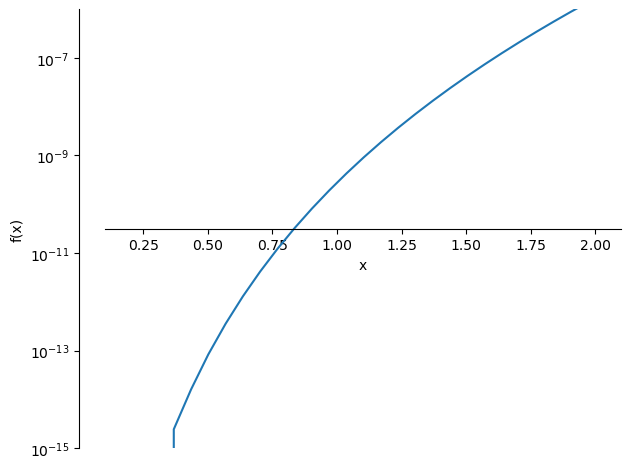

In [27]:
e4 = (nu4+1)/(nu4-1)
p1 = sympy.plotting.plot( np.abs( e4-sympy.exp(x)), xlim=(0.1,2.1), 
                         ylim=(1.0e-15,1.0e-6), yscale='log', adaptive=False, nb_of_points=300 )

There are interesting practical facts about that graph that can be usefully discussed.  Why is there a funny vertical segment on the left end, for instance?

### Randomness in Continued Fractions

One of the "generic good questions" in the Preamble was "What does a random choice look like?"  For continued fractions, this opens a _huge_ collection of questions.  For instance, if we choose an $x_0$ "at random" in the interval $(0,1)$, what does its continued fraction look like?  And what does that even mean, "look like"?  A great mathematician, [A. Y. Khinchin](https://en.wikipedia.org/wiki/Aleksandr_Khinchin) (there are about half-a-dozen different ways to transliterate his name to English), solved important problems in this area, and looking at his solutions gives a very good introduction to the deep mathematics known as _ergodic theory_.  

Quite clearly, in this section we have wandered into topics more suited to the graduate and senior students.  Still, quite a lot of this is an _example_ of the deep theory, and is actually quite accessible.

One answer (Khinchin's answer, with help from Gauss and from Kuzmin) to what continued fractions "look like" is to look at a [frequency distribution](https://en.wikipedia.org/wiki/Frequency_(statistics)) of the partial quotients that arise.  This is related to the distribution of the $x_n$ that arise from the dynamical system $x_n = G(x_{n-1})$ starting from a "random" $x_0$; this is an instance of the previously-mentioned ergodic theory.  It turns out the $x_n$ are distributed not uniformly but according to a known distribution, the so-called _Gauss measure_.  We will see more of this in the "Bohemian matrices" unit (actually in the report on one of the activities).

Back to partial quotients $a_n$ and their distribution. We've been working with $\pi$ here, so we know its first few partial quotients: $[3,7,15,1,292,\ldots]$.  R. William Gosper computed several _million_ partial quotients for $\pi$ in the 1970s, and nowadays many more are known: see [A001203](http://oeis.org/A001203).  At this time of writing, the record holder is Syed Fahad, with 30 _billion_ partial quotients. Okay, then. So we ought to be able to study the statistics of this particular continued fraction, and in particular we can draw a frequency distribution.  Below, we use only 5000 partial quotients, and drew the resulting frequency distribution.  About 40% of the time, the partial quotient is a $1$.  Next most common is a $2$.  The relative likelihood of a partial quotient appearing seems to diminish with its size.  This is indeed what happens if one chooses $x_0$ "at random"; But!

_It is not known if the distribution of the partial quotients of $\pi$_ are "typical" (everyone thinks so, but there is no proof). What _is_ known, which Khinchin proved, is that the distribution is the same (the [Gauss–Kuzmin distribution](https://en.wikipedia.org/wiki/Gauss–Kuzmin_distribution)) for _almost all_ initial numbers $x_0$ in the interval (in a technical sense, for a set of measure 1); and that the geometric mean of the partial quotients tends to a constant, now called [Khinchin's constant](https://en.wikipedia.org/wiki/Khinchin's_constant).

```{image} ../Figures/Continued\ Fractions/fivethousand.png
:height: 300px
:alt: Frequency distribution for five thousand partial quotients of pi
:align: center
```

There are other kinds of "random continued fractions" questions that could be asked.  We invite you to pose some!  We take up this challenge in the exercises for the "Bohemian Matrices" unit, where we again see the Gauss&ndash;Kuzmin distribution.

## Looking back at the programming constructs we have mentioned

It is possible to _start_ with this unit, so we repeated a lot of what we did in the Fibonacci unit.

We didn't repeat the instructions for how to name variables in Python, though: in brief, start with a letter or underscore (`_`), you can use numbers, but you can't name your variable exactly the same as a reserved word in Python.  We mentioned the old Fortran convention for names of variables: variables whose names begin with any of the letters `I` through `N` are (possibly) integers.  This convention is still widely used, and makes programs _more readable for humans_ if it is adhered to.

We have used `=` to put the thing on the right in as the contents of the container on the left; we have introduced the data types of integer, list, float, and NumPy arrays.  We have shown arithmetic operators such as `+` and `*` and `%` and shown that the ordinary rules of precedence work fine (except brackets are needed for `%` for clarity). We have introduced some object-oriented syntax (for plots, because matplotlib uses objects in that way).  We have shown how to use `for` loops, `while` loops, `if` statements, and how to create a list using a `for` statement and a "range". We have shown how to define functions and how to write recursive functions.  We have shown how to use `print` statements and how to use Jupyter Notebook as a "REPL" (Read-Eval-Print-Loop).  We have shown how to do modular arithmetic with the `%` operator.  We have shown how to import packages such as `time` and `matplotlib` and `numpy`.

Extra things in this unit not in the Fibonacci unit: explicitly `append`ing things to lists.  We also showed (in the second cell block!) how to use a `for` statement with all elements of a list using `for s in L`.  Formatting statements for printing strings with data generated in the code as you go along. Importing the `math` package (which is different to `numpy` which is different to `scipy`; all these different math packages seem more than a bit weird, it's true).  We used (but didn't explain) a power tool for continued fractions from the `SymPy` package, which has yet a different kind of math.  This was our first use of an `iterator`.  Again we didn't explain that.  We showed that `SymPy` has a plotting facility (different to `matplotlib`) and did not explain the differences.

We `vectorize`d one piece of code, but did not explain it. It makes some things more convenient.  This could be worth pursuing, in class.  Some students will be interested. [The documentation is here](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html).

The more you use these, the more comfortable you will be with them.  But already they should be useful for you.

## Notes and further reading

We have scattered several links throughout this unit.  Here are some more.

- [Sacred Geometry](https://www.sacred-geometry.es/?q=en/content/continued-fractions)

- [The results on the OEIS you get when you search for "Continued Fraction"](http://oeis.org/search?q=continued+fraction&language=english&go=Search)

- [Carl Douglas Olds' Chauvenet Prize-winning paper](https://www.jstor.org/stable/2318113) (JSTOR has free memberships available; but  you can go in through your library, if you have one, by using libkey.io/ instead of https:// for that link).

- [Bill Gosper's original work described in the famous MIT HAKMEM](https://w3.pppl.gov/~hammett/work/2009/AIM-239-ocr.pdf) Bill Gosper used Möbius transformations to perform arithmetic on _infinite_ continued fractions.  You should read it for Bill's language alone (he still talks like that, and is simply wonderful to be around).  There are also astonishing facts about continued fractions in there: for instance, _every_ continued fraction where the partial quotients are in arithmetic progression has a known closed form involving Bessel functions.

- [A lovely paper on the geometry of continued fractions by Alan Beardon and Ian Short](https://www.jstor.org/stable/10.4169/amer.math.monthly.121.05.391) which makes some beautiful diagrams of _horocircles_ and makes use of Möbius transformations.

- [A shorter and even more lovely paper by Alan Beardon](https://www.jstor.org/stable/10.4169/math.mag.88.4.272) again using Möbius maps.

## Open Problems/Big Projects
```{epigraph}
math wasn’t invented or discovered, math was manifested

-- [Mansi Bezbaruah](https://twitter.com/djmansib/status/1486205992140476417?s=20&t=JJ1YOr3N2adjFCBubzwiew)
```

0. Open the Online Encyclopedia of Integer Sequences, and choose a sequence to work with (say, [The Thue&ndash;Morse sequence A010060](http://oeis.org/A010060).  Turn it into a continued fraction any way you like (e.g. make a decimal out of the sequence and compute its continued fraction; but do as you please!).  Discover something about that continued fraction. Do not, and we repeat, do not get distracted and explore the OEIS for its own sake.  Really, don't do that. Wait! Stop! Come back!
1. Are the elements (partial quotients) in the CF for Stark's number bounded?  Some references: [A paper on algorithms to compute continued fractions](https://doi.org/10.1007/3-540-61581-4_39) and [a page of Arcana including Continued Fractions](http://www.numericana.com/answer/fractions.htm).
2. Is there any pattern in the simple continued fraction for $\pi$?
3. What can you say about continued fractions of bounded height? 
4. Implement a "rounded rational" arithmetic package (in whatever language you like). Try to give an "IEEE-like" guarantee:
rr$(a\ op\ b) = (a\ op\ b)(1 + \delta)$ where $\left|\delta\right|$ is as small as possible given the restriction.  RMC did this years ago in a now-vanished language (which might come back).  You can find that source code in Chapter 22 of [The Aldor Manual](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.196.3360&rep=rep1&type=pdf).
5. Does the continued fraction for [Khinchin's constant](https://en.wikipedia.org/wiki/Khinchin's_constant) follow the Gauss–Kuzmin distribution? It's a pretty puzzle to compute the constant quickly, by the way. See [http://oeis.org/A002210](http://oeis.org/A002210).
\begin{equation}
K = \prod_{k\ge 1} \left( 1 + \frac{1}{k(k+2)}\right)^{\log_2 k} \approx 2.685452001\ldots
\end{equation}

[^1]: Here, $x_0 = 1$, $x_1 = \frac{3}{2}$, so on and so forth.

[^2]: In English as opposed to mathematics, zero is not a number. If we say that, we have a number of things to talk about, we don't mean there's nothing to say!

[^3]: Avogadro's number is $6.022\cdot 10^{23}$, about.

[^4]: There is for sure a possibility that you will doubt this, at this moment. No proof will be provided here just yet, because not everyone likes proofs.

[^5]: Except when we subtracted 7 from 7.000 we got $1.40\cdot10^{-8}$, not zero! So the 7 for $B$ should have been 6, the game _didn't_ stop, and $C$ gets something that displays as $1.000$, take $\boxed{1}$, and the fractional part is $1.400\cdot10^{-10}$. _oops_.